In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from ucimlrepo import fetch_ucirepo 
import time
from itertools import product

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from scipy.stats import kurtosis
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection, GaussianRandomProjection
from sklearn.manifold import Isomap
from sklearn import manifold

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from multiprocessing import Pool

In [3]:
data_name = 'Landsat'
case = ''

In [4]:
# fetch dataset 
statlog_landsat_satellite = fetch_ucirepo(id=146) 
  
# data (as pandas dataframes) 
X_df = statlog_landsat_satellite.data.features 
y_df = statlog_landsat_satellite.data.targets 
  
# metadata 
print(statlog_landsat_satellite.metadata) 
  
# variable information 
print(statlog_landsat_satellite.variables) 

print(X_df)
print(y_df)

{'uci_id': 146, 'name': 'Statlog (Landsat Satellite)', 'repository_url': 'https://archive.ics.uci.edu/dataset/146/statlog+landsat+satellite', 'data_url': 'https://archive.ics.uci.edu/static/public/146/data.csv', 'abstract': 'Multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification associated with the central pixel in each neighbourhood', 'area': 'Climate and Environment', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 6435, 'num_features': 36, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C55887', 'creators': ['Ashwin Srinivasan'], 'intro_paper': None, 'additional_info': {'summary': "The database consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the classification as

In [5]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   6435 non-null   int64
 1   Attribute2   6435 non-null   int64
 2   Attribute3   6435 non-null   int64
 3   Attribute4   6435 non-null   int64
 4   Attribute5   6435 non-null   int64
 5   Attribute6   6435 non-null   int64
 6   Attribute7   6435 non-null   int64
 7   Attribute8   6435 non-null   int64
 8   Attribute9   6435 non-null   int64
 9   Attribute10  6435 non-null   int64
 10  Attribute11  6435 non-null   int64
 11  Attribute12  6435 non-null   int64
 12  Attribute13  6435 non-null   int64
 13  Attribute14  6435 non-null   int64
 14  Attribute15  6435 non-null   int64
 15  Attribute16  6435 non-null   int64
 16  Attribute17  6435 non-null   int64
 17  Attribute18  6435 non-null   int64
 18  Attribute19  6435 non-null   int64
 19  Attribute20  6435 non-null   int64
 20  Attribut

In [6]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   6435 non-null   int64
dtypes: int64(1)
memory usage: 50.4 KB


In [46]:
print('Classes')
print(y_df.groupby(['class'])['class'].count())
np.array(y_df.groupby(['class'])['class'].count())*(1./y_df.shape[0])

Classes
class
1    1533
2     703
3    1358
4     626
5     707
7    1508
Name: class, dtype: int64


array([0.23822844, 0.10924631, 0.21103341, 0.0972805 , 0.10986791,
       0.23434343])

In [10]:
data_df = pd.concat([X_df, y_df], axis=1)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Attribute1   6435 non-null   int64
 1   Attribute2   6435 non-null   int64
 2   Attribute3   6435 non-null   int64
 3   Attribute4   6435 non-null   int64
 4   Attribute5   6435 non-null   int64
 5   Attribute6   6435 non-null   int64
 6   Attribute7   6435 non-null   int64
 7   Attribute8   6435 non-null   int64
 8   Attribute9   6435 non-null   int64
 9   Attribute10  6435 non-null   int64
 10  Attribute11  6435 non-null   int64
 11  Attribute12  6435 non-null   int64
 12  Attribute13  6435 non-null   int64
 13  Attribute14  6435 non-null   int64
 14  Attribute15  6435 non-null   int64
 15  Attribute16  6435 non-null   int64
 16  Attribute17  6435 non-null   int64
 17  Attribute18  6435 non-null   int64
 18  Attribute19  6435 non-null   int64
 19  Attribute20  6435 non-null   int64
 20  Attribut

In [11]:
# count the duplicated cases
data_df.duplicated().sum()

0

In [12]:
nans = data_df.isna()
print('Missing values')
print(nans.sum(axis=0))

Missing values
Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
Attribute21    0
Attribute22    0
Attribute23    0
Attribute24    0
Attribute25    0
Attribute26    0
Attribute27    0
Attribute28    0
Attribute29    0
Attribute30    0
Attribute31    0
Attribute32    0
Attribute33    0
Attribute34    0
Attribute35    0
Attribute36    0
class          0
dtype: int64


<Axes: >

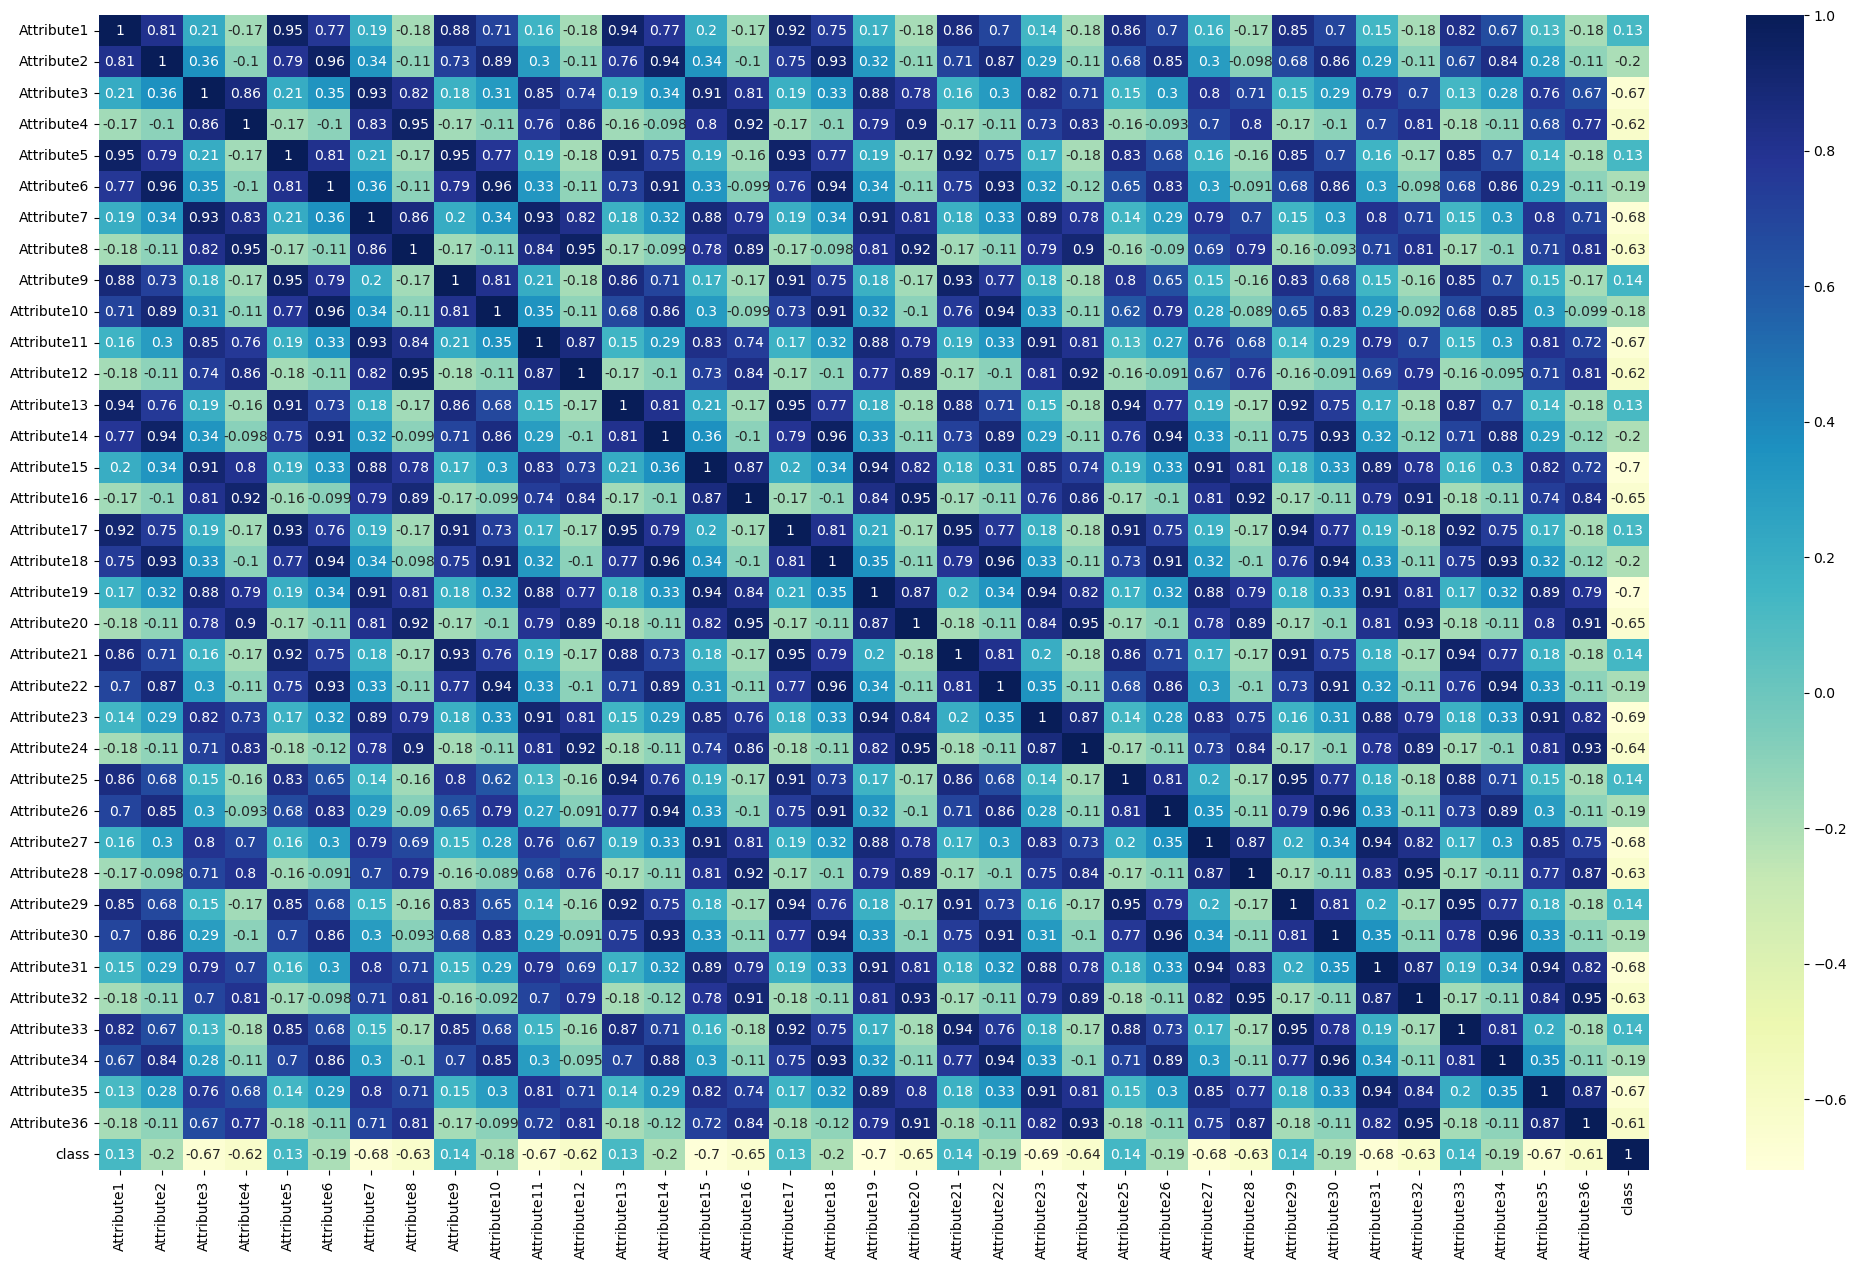

In [8]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(data_df.corr(),annot=True,cmap="YlGnBu" , ax=ax)

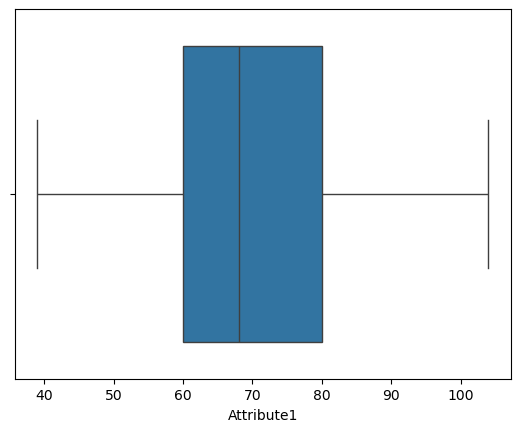

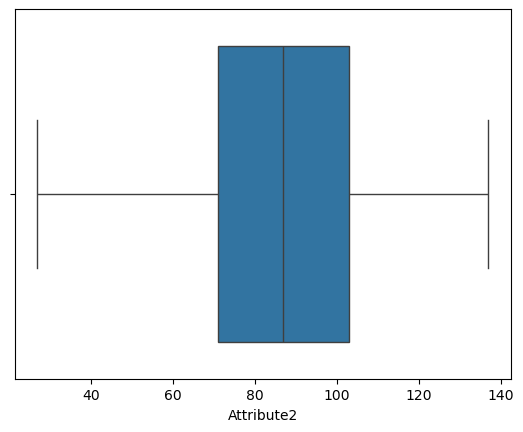

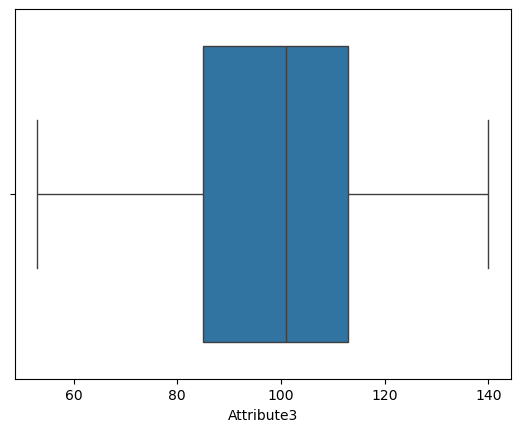

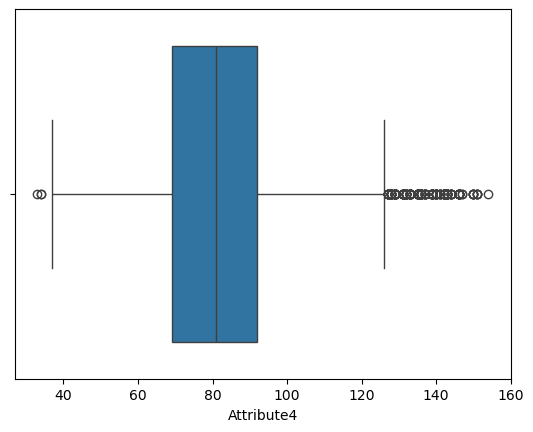

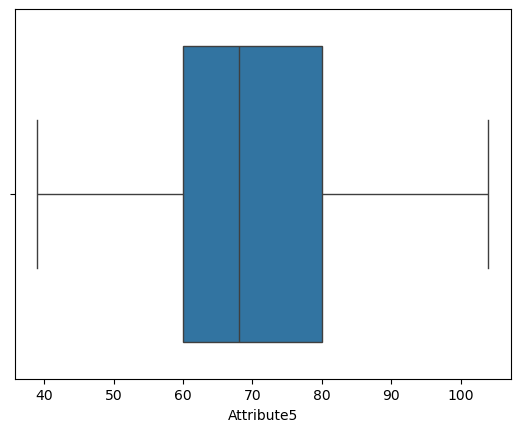

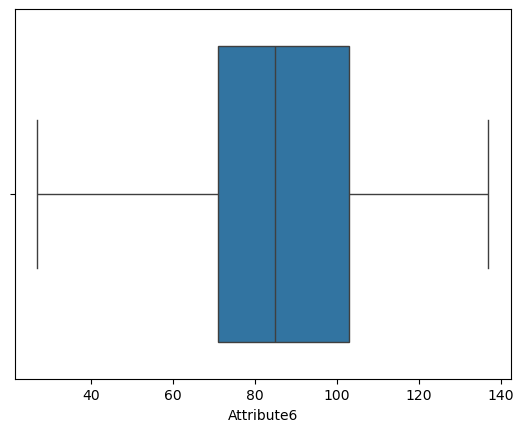

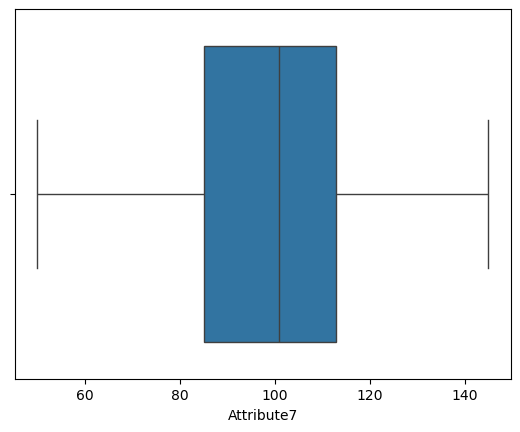

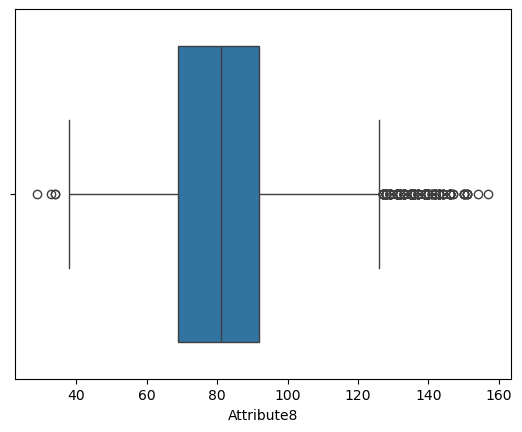

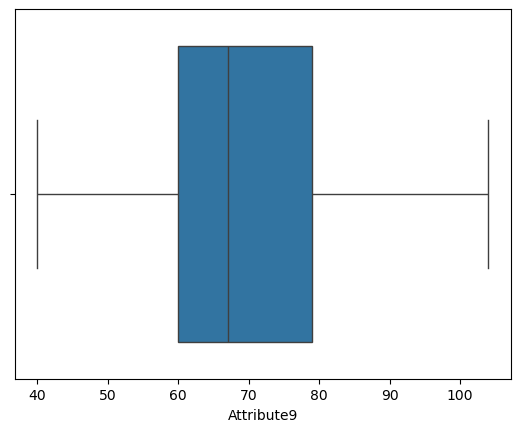

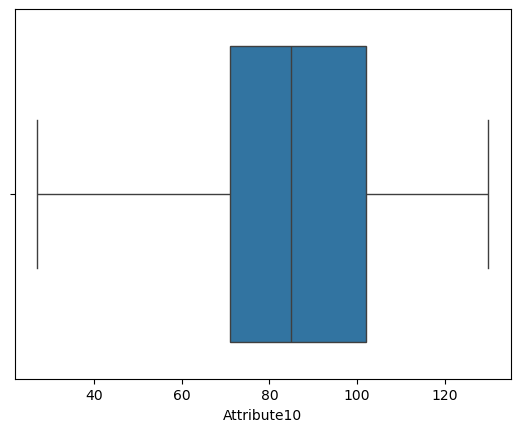

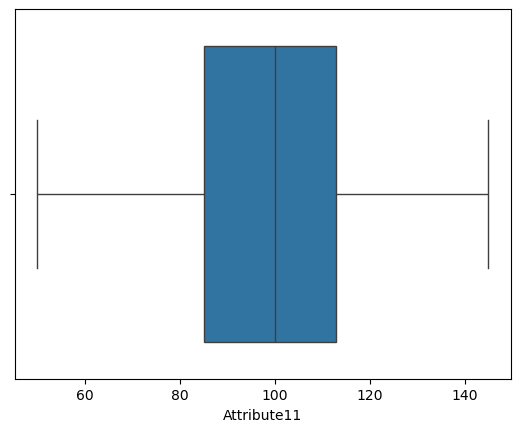

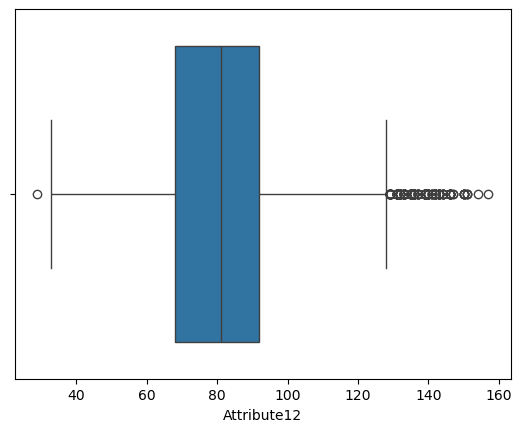

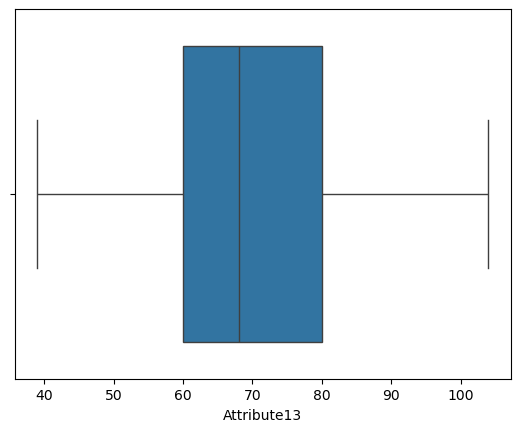

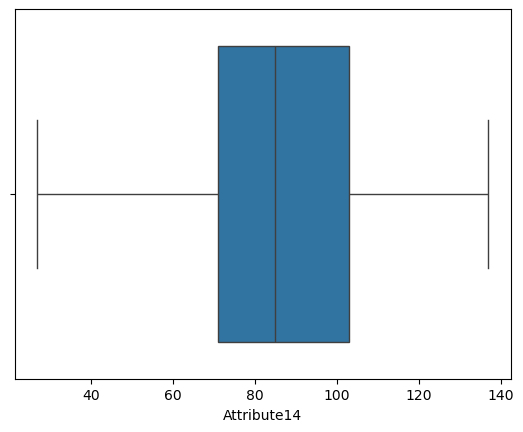

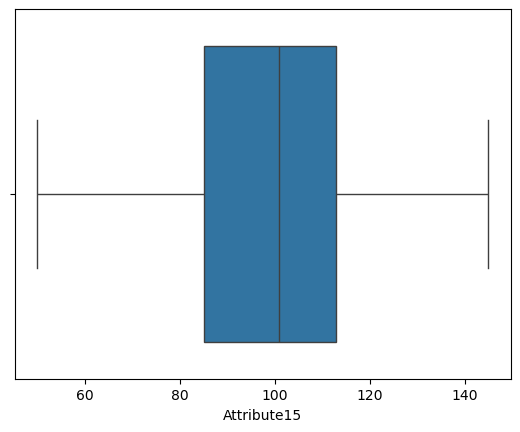

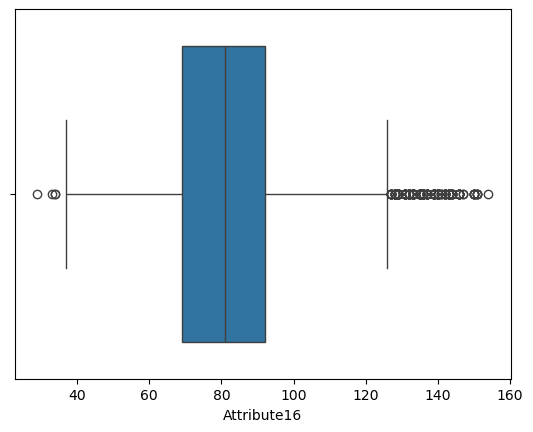

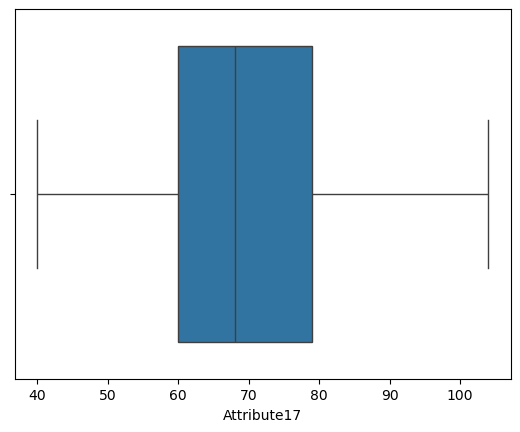

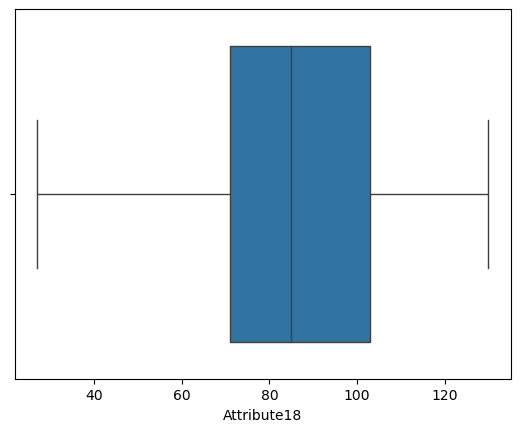

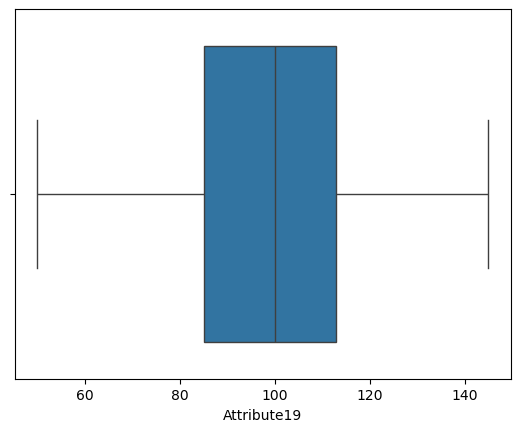

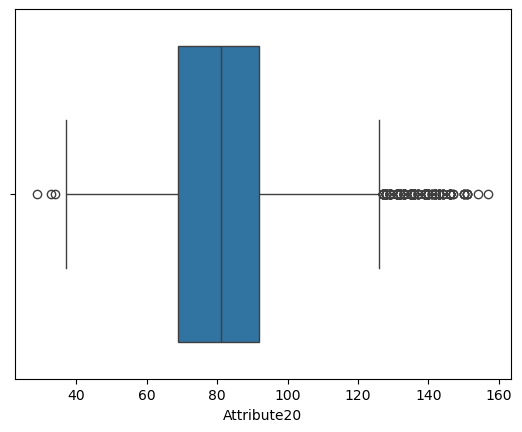

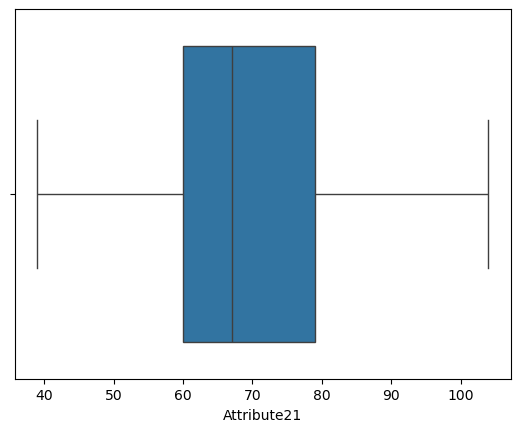

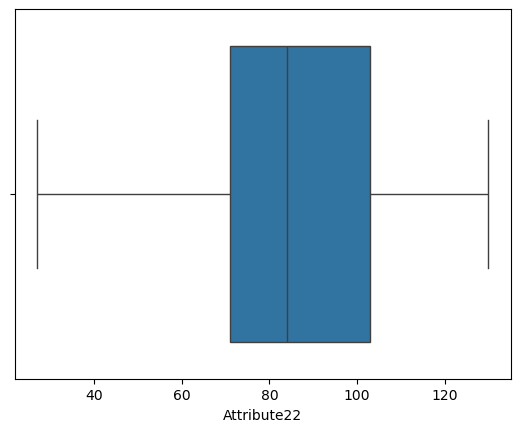

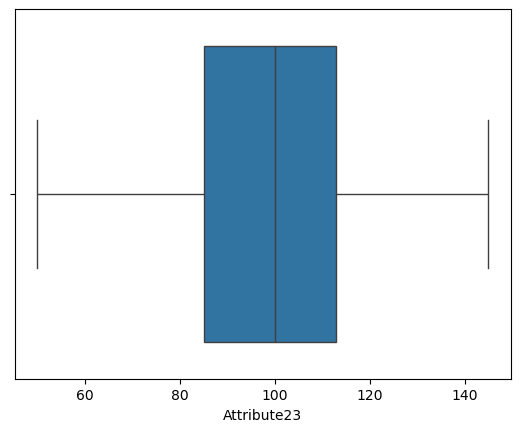

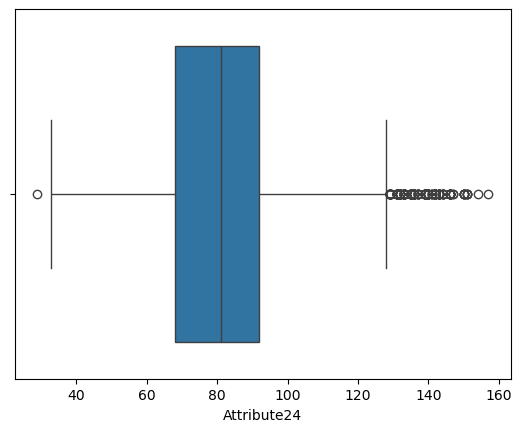

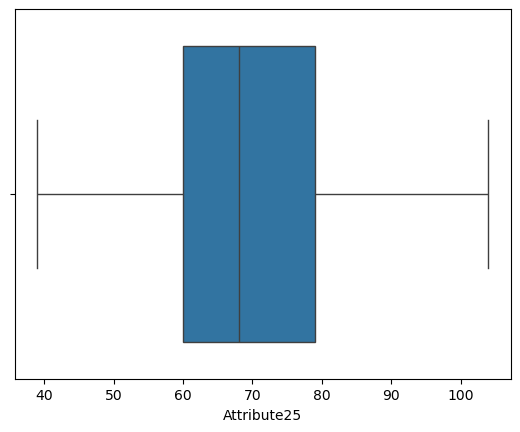

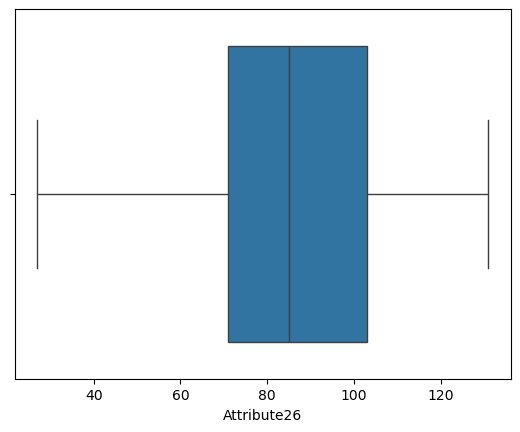

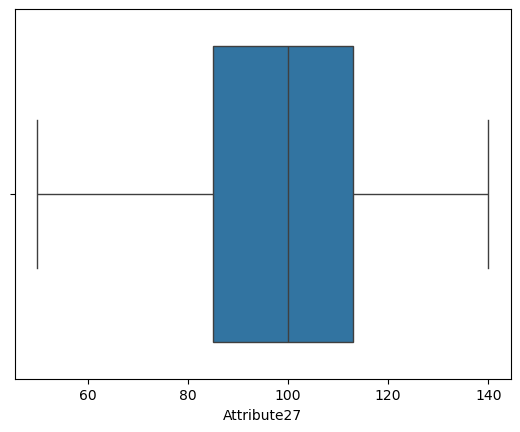

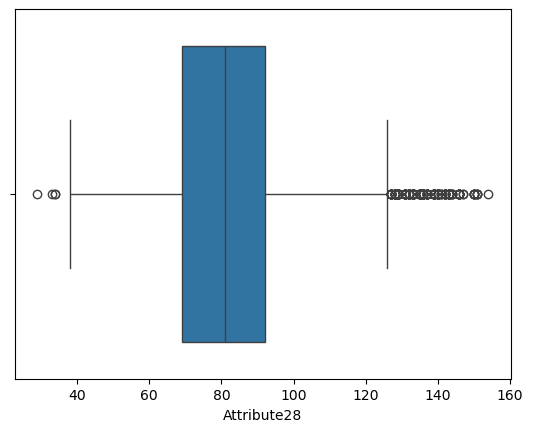

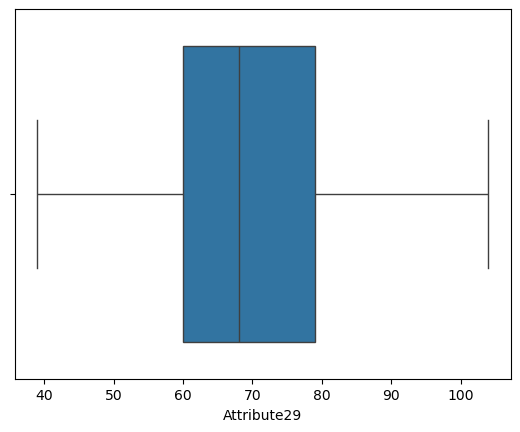

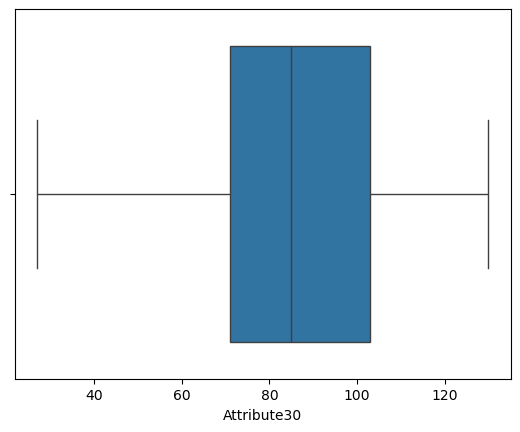

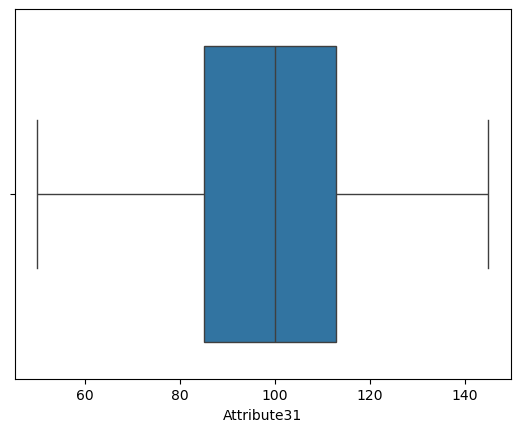

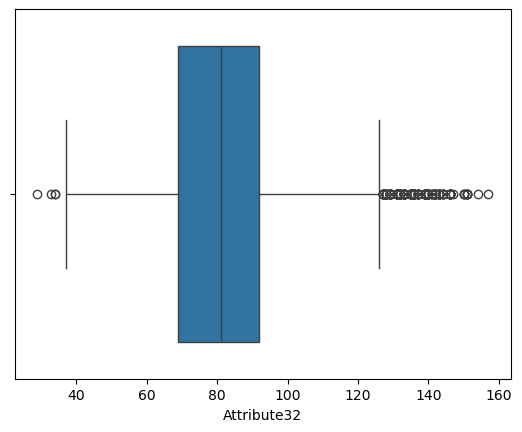

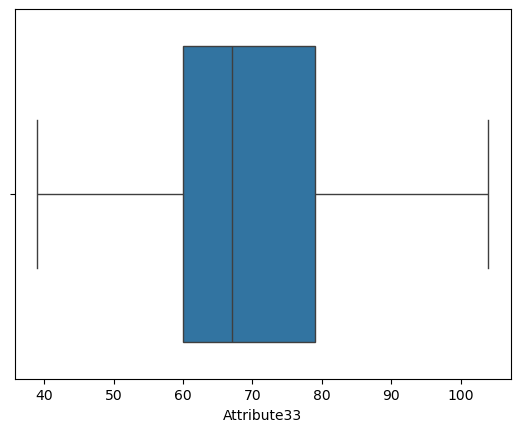

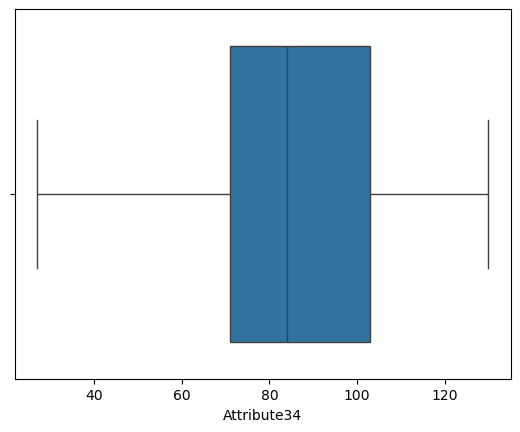

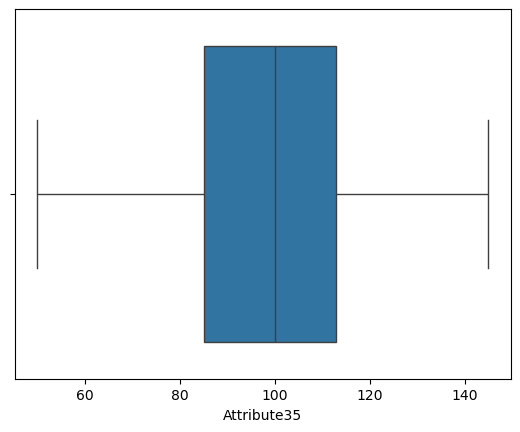

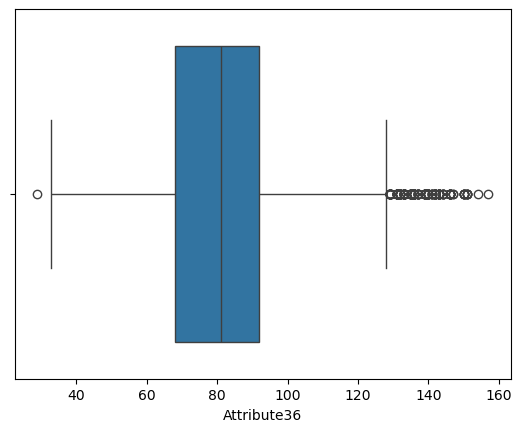

In [25]:
# Box plots for outliers
i = 0
for x in list(data_df.columns)[0:-1]:
    i += 1
    plt.figure(i)
    sns.boxplot(x=data_df[x])
    plt.show()
    plt.close()

In [13]:
#for col in list(X_df.columns):
#
#    # Calculate quantiles
#    Q1 = data_df[col].quantile(0.25)
#    Q3 = data_df[col].quantile(0.75)
#    IQR = Q3 - Q1
#    # Calculate upper and lower bounds
#    upper_bound = Q3 + 1.5 * IQR
#    lower_bound = Q1 - 1.5 * IQR
#    # Identify outliers
#    outliers = data_df[(data_df[col] > upper_bound) | (data_df[col] < lower_bound)]
#    # Remove outliers
#    data_df = data_df[(data_df[col] <= upper_bound) & (data_df[col] >= lower_bound)]
#
#print('Data counts without the outliers')
#print(data_df.groupby(['class'])['class'].count())

In [14]:
# Feature df
X_df = data_df.copy()
X_df.drop(['class'], axis=1, inplace=True)

X = X_df.values
y = data_df['class'].values

seed = 903946366

# Shuffle data and then split into the training and the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = seed, 
                                                    stratify = y)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_orig = X_train
X_test_orig = X_test

In [20]:
X_df.columns

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
       'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
       'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
       'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
       'Attribute35', 'Attribute36'],
      dtype='object')

In [15]:
# FIND the feature matrix rank
np.linalg.matrix_rank(X)

36

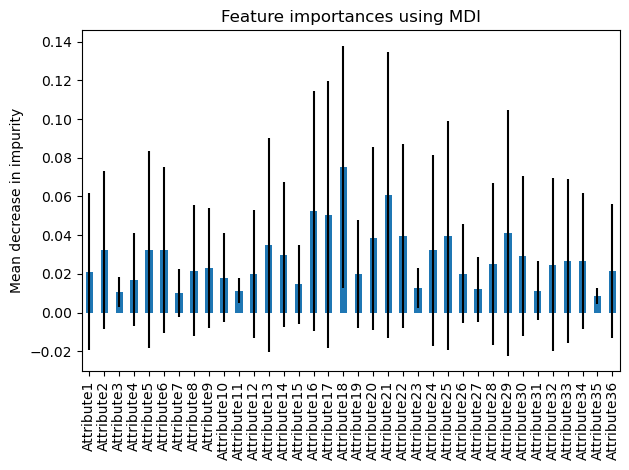

In [16]:
# Feature importance through random forest
forest = RandomForestClassifier(random_state=seed)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X_df.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()
plt.close(fig)

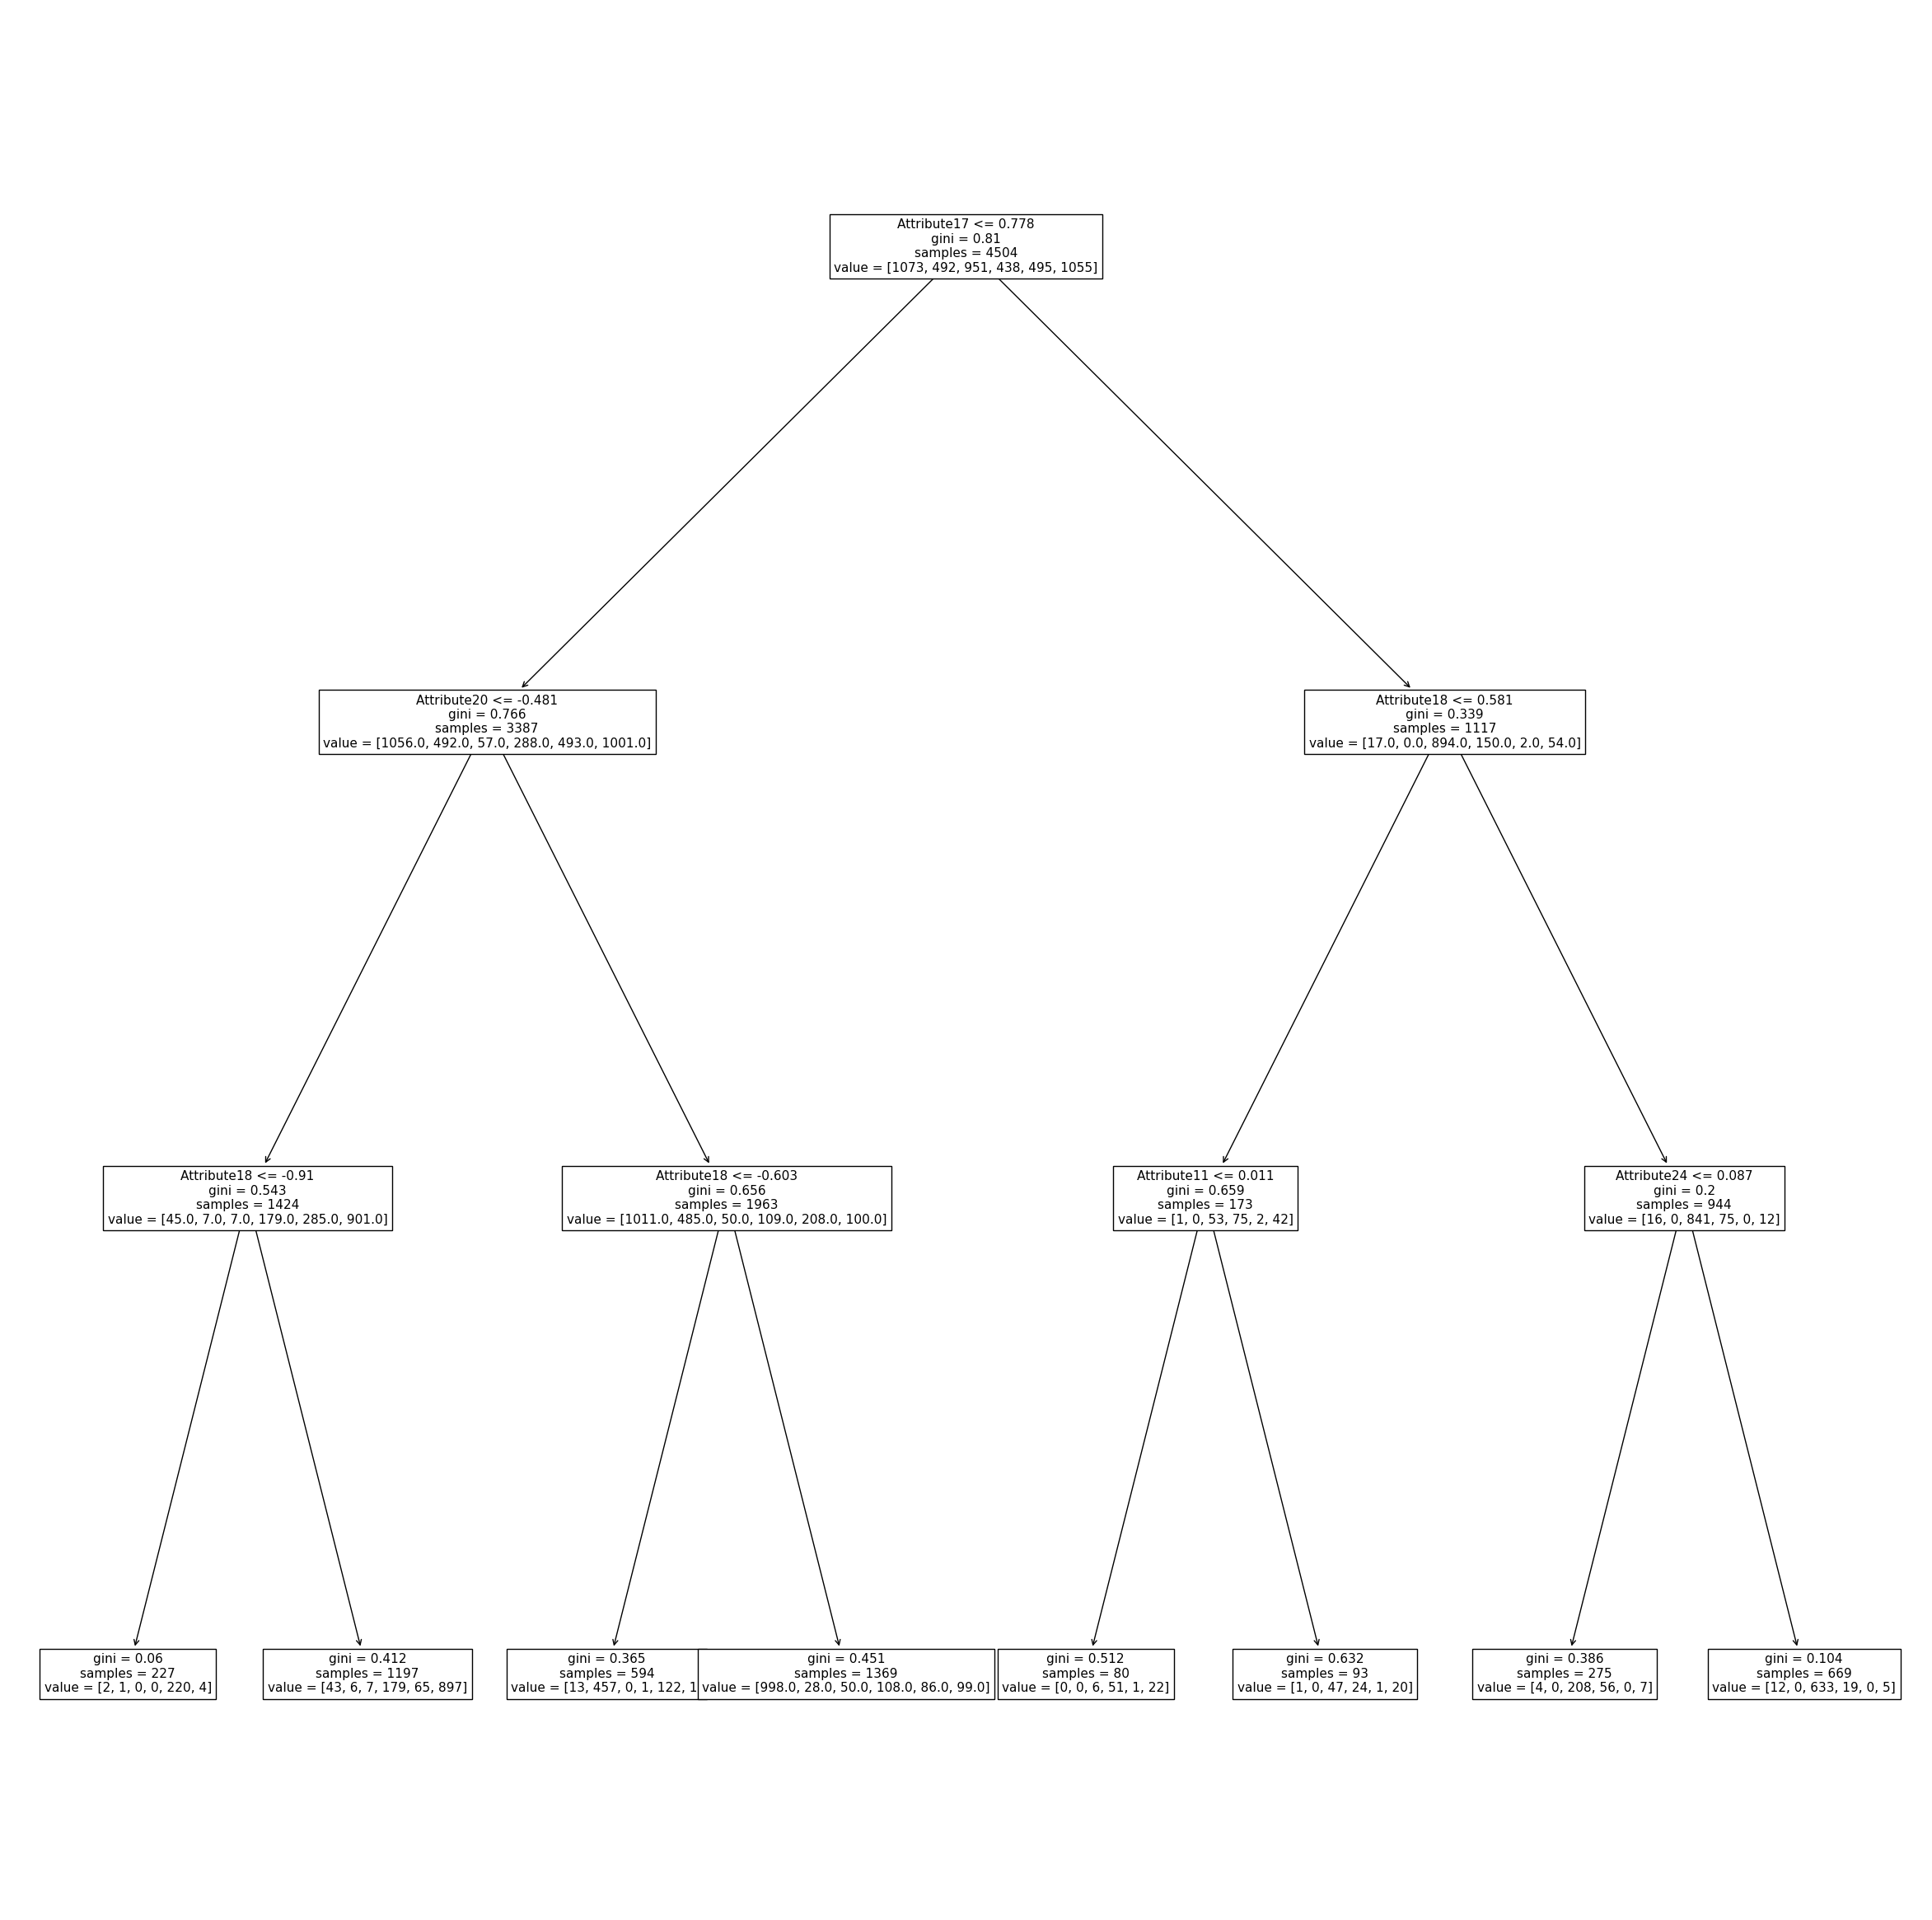

        feature  importance
17  Attribute18    0.391198
16  Attribute17    0.333488
19  Attribute20    0.261842
10  Attribute11    0.007042
23  Attribute24    0.006430
32  Attribute33    0.000000
31  Attribute32    0.000000
30  Attribute31    0.000000
29  Attribute30    0.000000
28  Attribute29    0.000000
27  Attribute28    0.000000
20  Attribute21    0.000000
26  Attribute27    0.000000
25  Attribute26    0.000000
24  Attribute25    0.000000
22  Attribute23    0.000000
33  Attribute34    0.000000
34  Attribute35    0.000000
21  Attribute22    0.000000
0    Attribute1    0.000000
18  Attribute19    0.000000
1    Attribute2    0.000000
15  Attribute16    0.000000
14  Attribute15    0.000000
13  Attribute14    0.000000
12  Attribute13    0.000000
11  Attribute12    0.000000
9   Attribute10    0.000000
8    Attribute9    0.000000
7    Attribute8    0.000000
6    Attribute7    0.000000
5    Attribute6    0.000000
4    Attribute5    0.000000
3    Attribute4    0.000000
2    Attribute3    0

In [47]:
# Decision tree classifier

clf = DecisionTreeClassifier(max_depth=3, random_state=seed)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

fig = plt.figure(figsize=(30,30))
plot_tree(clf, feature_names = list(X_df.columns), fontsize=11)
plt.show()
#fig.savefig('DT-max_depth-3.png')
plt.close(fig)

# Get feature importances
importances = clf.feature_importances_

# Create a dataframe to display feature importances
feature_names = X_df.columns
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the dataframe by importance in descending order
feature_importances.sort_values(by='importance', ascending=False, inplace=True)

print(feature_importances)

In [18]:
def kmeans_tuning(X_train, max_clusters, seed):
    range_n_clusters = list(range(2, max_clusters+1))
    inertias = []
    silhouette_avg_scores = []
    ch_scores = []
    
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=seed, init="k-means++", max_iter=1000, n_init=20)
        cluster_labels = kmeans.fit_predict(X_train)
        inertias.append(kmeans.inertia_)
        silhouette_avg_scores.append(silhouette_score(X_train, cluster_labels))
        ch_scores.append(metrics.calinski_harabasz_score(X_train, cluster_labels))
    return inertias, silhouette_avg_scores, ch_scores

In [106]:
inertias, silhouette_avg_scores, ch_scores = kmeans_tuning(X_train_orig, 20, seed)

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

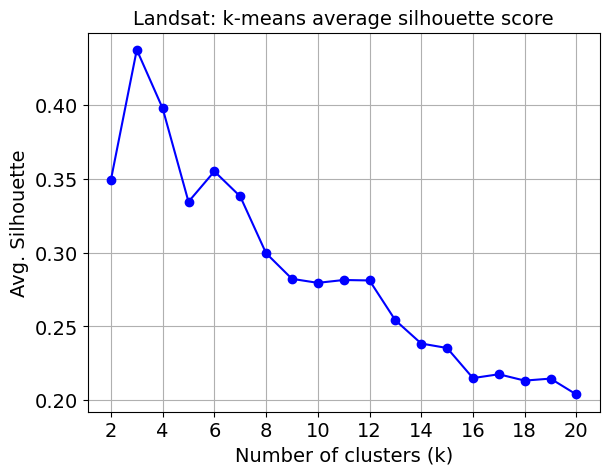

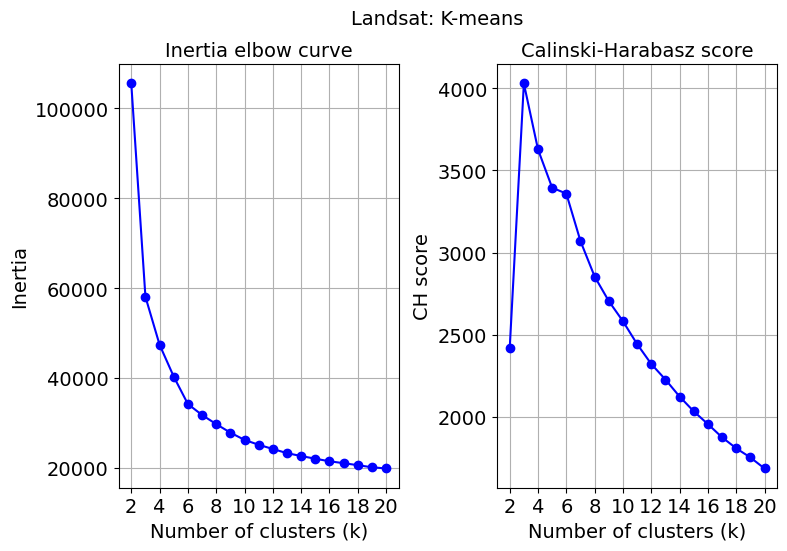

In [124]:
#inertias, silhouette_avg_scores = kmeans_tuning(X_train, 20, seed)
max_clusters = 20
range_n_clusters = list(range(2, max_clusters+1))

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range_n_clusters, silhouette_avg_scores,'-o', color='b')

ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat: k-means average silhouette score', fontsize=fontsize)
ax.set_xlabel('Number of clusters (k)', fontsize=fontsize) 
ax.set_ylabel('Avg. Silhouette', fontsize=fontsize)
ax.set_xticks(range(2,22,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
fig.savefig('Landsat_kmeans_silhouette.png')
plt.close(fig)


fontsize = 14
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(8.5, 5.5))
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax1.plot(range_n_clusters, inertias,'-o', color='b')

ax1.tick_params(labelsize=fontsize)
ax1.set_title('Inertia elbow curve', fontsize=fontsize)
ax1.set_xlabel('Number of clusters (k)', fontsize=fontsize) 
ax1.set_ylabel('Inertia', fontsize=fontsize)
ax1.set_xticks(range(2,22,2))
#plt.rcParams['axes.titley'] = 1.0
ax1.grid(True)
#plt.show()

#fontsize = 14
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax2.plot(range_n_clusters, ch_scores,'-o', color='b')
ax2.tick_params(labelsize=fontsize)
ax2.set_title('Calinski-Harabasz score', fontsize=fontsize)
ax2.set_xlabel('Number of clusters (k)', fontsize=fontsize) 
ax2.set_ylabel('CH score', fontsize=fontsize)
ax2.set_xticks(range(2,22,2))
#plt.rcParams['axes.titley'] = 1.0
ax2.grid(True)
fig.suptitle('Landsat: K-means', fontsize=fontsize) 
fig.subplots_adjust(wspace=0.35)
fig.savefig('Landsat_kmeans_CH.png')
plt.show()
plt.close(fig)



K=4


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3977934272003217


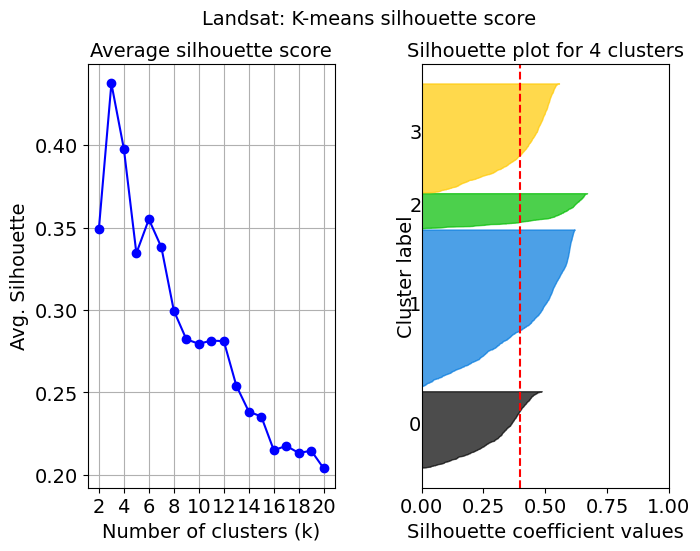

In [123]:
#inertias, silhouette_avg_scores = kmeans_tuning(X_train, 20, seed)
max_clusters = 20
range_n_clusters = list(range(2, max_clusters+1))

fontsize = 14
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(7.5, 5.5))
ax0.plot(range_n_clusters, silhouette_avg_scores,'-o', color='b')
ax0.tick_params(labelsize=fontsize)
ax0.set_title('Average silhouette score', fontsize=fontsize)
ax0.set_xlabel('Number of clusters (k)', fontsize=fontsize) 
ax0.set_ylabel('Avg. Silhouette', fontsize=fontsize)
ax0.set_xticks(range(2,22,2))
#plt.rcParams['axes.titley'] = 1.0
ax0.grid(True)


range_n_clusters = list(range(3, 7))
range_n_clusters = [4]
for n_clusters in range_n_clusters:
    
    print(f'K={n_clusters}')
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1000, n_init=10)
    cluster_labels = kmeans.fit_predict(X_train)
    
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    #silhouette_avg_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_train, cluster_labels)

   # fig, ax1 = plt.subplots(1, 1)
    #fig.set_size_inches(9, 7)
    y_lower = 10
                                                  
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=fontsize)

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("Silhouette plot for 4 clusters", fontsize=fontsize)
    ax1.set_xlabel("Silhouette coefficient values", fontsize=fontsize)
    ax1.set_ylabel("Cluster label", fontsize=fontsize)
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_xlim((0, 1))
    ax1.tick_params(labelsize=fontsize)
    fig.subplots_adjust(wspace=0.35)
    fig.suptitle('Landsat: K-means silhouette score', fontsize=fontsize) 
    fig.savefig('Landsat_kmeans_silhouette.png')
    plt.show()
    plt.close(fig)

K=3


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.4374679069188778


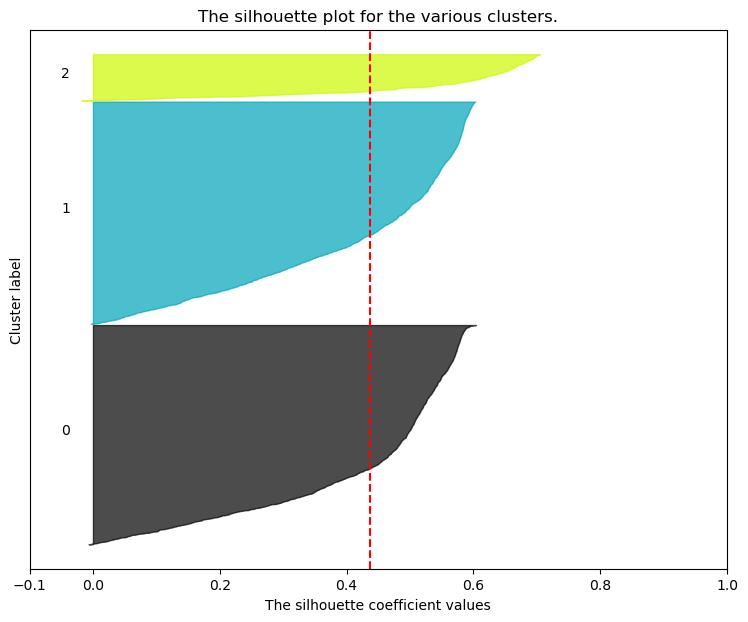

K=4


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3977934272003217


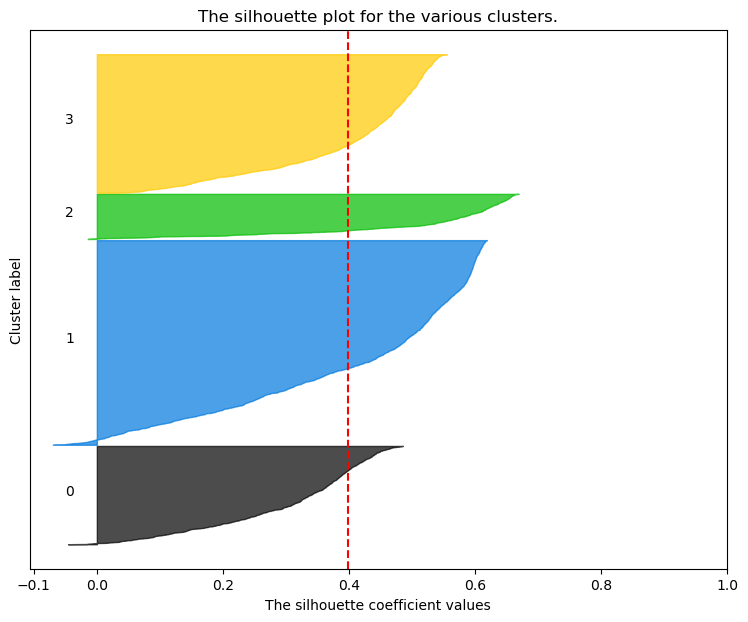

K=5


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.3346055061631286


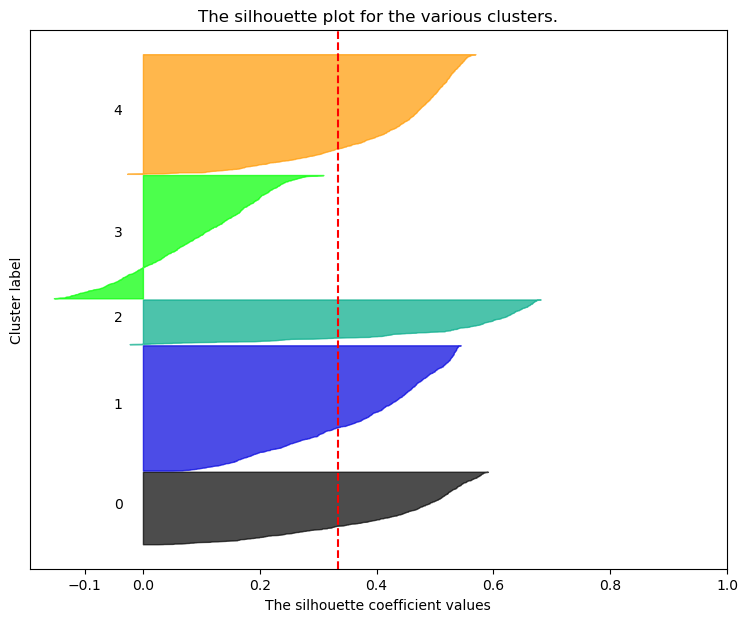

K=6


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3547874871496667


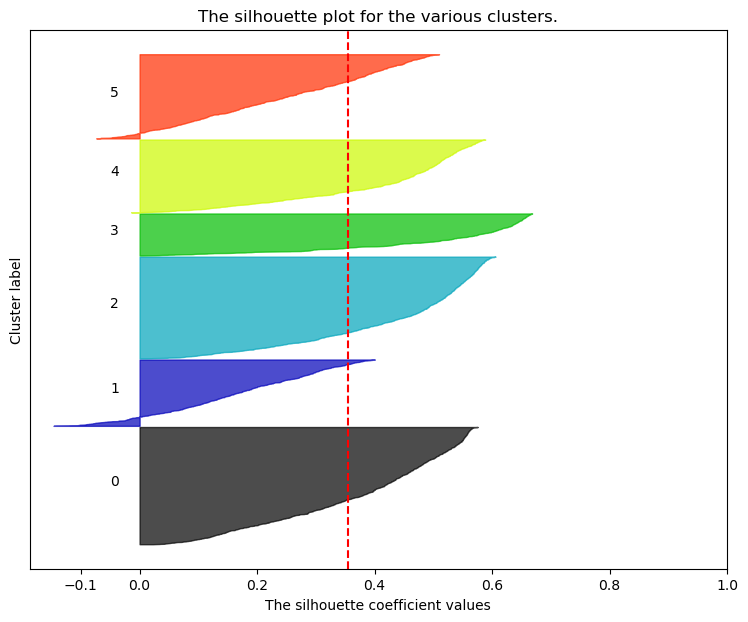

In [328]:
X = X_train_orig

range_n_clusters = list(range(3, 7))

for n_clusters in range_n_clusters:
    
    print(f'K={n_clusters}')
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1000, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    y_lower = 10
                                                  
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()
    #fig.savefig('rhc_effect_max_attempts.png')
    plt.close(fig)

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


Train time 0.3342767000431195
__________________________________________________________________________________
algo		inertia		homo	compl	v-meas	ARI	AMI	silhouette
K=4      	47431.645	0.486	0.661	0.560	0.459	0.559	0.398


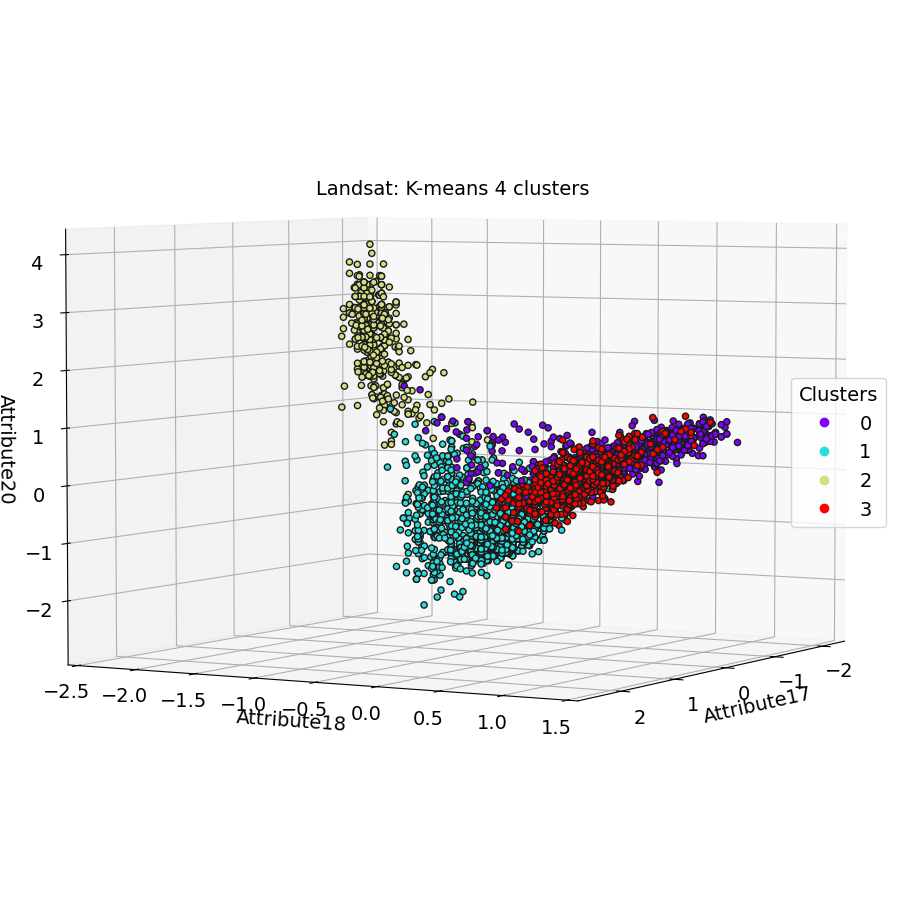

In [412]:
X_train = X_train_orig
X_test = X_test_orig

# Predict clusters
method='K-means'
n_clusters=4

tic = time.perf_counter()
kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1000, n_init=10).fit(X_train)
toc = time.perf_counter()
print('Train time', toc-tic)

#kmeans.fit_predict(X_train)
cluster_labels = kmeans.predict(X_train)
#
# --------------------------------------------------------------------------------
results=[f'K={n_clusters}', kmeans.inertia_]
# Define the metrics which require only the true labels and estimator labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]
results += [m(y_train, cluster_labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [metrics.silhouette_score(X_train, cluster_labels)]
# Show the results
formatter_result = (
    "{:9s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(82 * "_")
print("algo\t\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))
# --------------------------------------------------------------------------------
#
# Plot clusters
fontsize = 14

elev=4
azim=30

fig = plt.figure(1, figsize=(11.5, 11.5))
ax = fig.add_subplot(111,projection="3d", elev=elev, azim=azim)

plot3d_features = ["Attribute17", "Attribute18", "Attribute20"]
col_X = [list(X_df.columns).index(x) for x in plot3d_features]
(X0, X1, X2) = (X_train[:, col_X[0]], X_train[:, col_X[1]], X_train[:, col_X[2]])
scatter = ax.scatter(X0, X1, X2, c=cluster_labels, cmap='rainbow', edgecolor="k", alpha=1)

ax.set_xlabel(plot3d_features[0], fontsize=fontsize)
ax.set_ylabel(plot3d_features[1], fontsize=fontsize,loc = "bottom")
ax.set_zlabel(plot3d_features[2], fontsize=fontsize)
ax.legend(scatter.legend_elements()[0], [f'{c}' for c in set(cluster_labels)], loc='center right', title="Clusters", fontsize=fontsize,title_fontsize=fontsize)
plt.rcParams['axes.titley'] = 0.85
ax.set_ylim((-2.5,1.5))
ax.set_title(f"{data_name}: {method} {n_clusters} clusters", fontsize=fontsize)
ax.tick_params(labelsize=fontsize, direction='in', length=3, width=2, colors='black')
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()
fig.savefig(f'{data_name}_{method}_{n_clusters}clusters.png')
#
# Bar plot counts
true_classes = list(set(y_train))
df_counts = pd.DataFrame(index=[f'Class{c}' for c in true_classes])
for cluster in set(cluster_labels): 
    unique_values, counts = np.unique(y_train[cluster_labels==cluster], return_counts=True)
    temp = [0]*len(true_classes)
    for i in range(len(unique_values)):
        temp[true_classes.index(unique_values[i])] = counts[i]    
    df_counts[f'Cluster{cluster}'] = temp
ax = df_counts.plot.barh(stacked=True, width=0.6, cmap='rainbow',figsize=(7, 2.5))
plt.rcParams['axes.titley'] = 1.0
ax.set_title(f"{data_name}: {method} {n_clusters} clusters", fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize)
plt.savefig(f'{data_name}_{method}_{n_clusters}clusters_barplot.png')
#

# Predict test set
pred_test_labels = kmeans.predict(X_test)

np.savetxt(f"{data_name}_{method}_{n_clusters}k_train_labels_{case}.csv", cluster_labels)
np.savetxt(f"{data_name}_{method}_{n_clusters}k_test_labels_{case}.csv" , pred_test_labels)

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


Train time 0.3037846999941394


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


__________________________________________________________________________________
algo		inertia		homo	compl	v-meas	ARI	AMI	silhouette
K=2      	105521.575	0.194	0.485	0.277	0.194	0.277	0.349


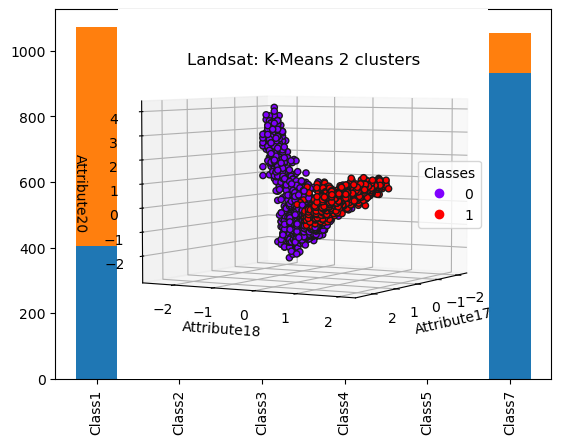

In [258]:
X_train = X_train_orig
X_test = X_test_orig

# Predict clusters
method='K-Means'
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1000, n_init=10)

tic = time.perf_counter()
cluster_labels = kmeans.fit(X_train)
toc = time.perf_counter()

print('Train time', toc-tic)

cluster_labels = kmeans.fit_predict(X_train)

#
# --------------------------------------------------------------------------------
results=[f'K={n_clusters}', kmeans.inertia_]
# Define the metrics which require only the true labels and estimator labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]
results += [m(y_train, cluster_labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [metrics.silhouette_score(X_train, cluster_labels)]
# Show the results
formatter_result = (
    "{:9s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(82 * "_")
print("algo\t\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))
# --------------------------------------------------------------------------------
#
# Plot clusters
elev=4
azim=30

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111,projection="3d", elev=elev, azim=azim)

plot3d_features = ["Attribute17", "Attribute18", "Attribute20"]
col_X = [list(X_df.columns).index(x) for x in plot3d_features]
(X0, X1, X2) = (X_train[:, col_X[0]], X_train[:, col_X[1]], X_train[:, col_X[2]])
scatter = ax.scatter(X0, X1, X2, c=cluster_labels, cmap='rainbow', edgecolor="k", alpha=1)

ax.set_xlabel(plot3d_features[0])
ax.set_ylabel(plot3d_features[1])
ax.set_zlabel(plot3d_features[2])
ax.legend(scatter.legend_elements()[0], [f'{c}' for c in set(cluster_labels)], loc='center right', title="Classes")
plt.rcParams['axes.titley'] = 0.9
#ax.set_ylim((-0.9,-0.6))
ax.set_title(f"{data_name}: {method} {n_clusters} clusters")
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

#
# Bar plot counts
true_classes = list(set(y_train))
df_counts = pd.DataFrame(index=[f'Class{c}' for c in true_classes])
for cluster in set(cluster_labels): 
    unique_values, counts = np.unique(y_train[cluster_labels==cluster], return_counts=True)
    temp = [0]*len(true_classes)
    for i in range(len(unique_values)):
        temp[true_classes.index(unique_values[i])] = counts[i]    
    df_counts[f'Cluster{cluster}'] = temp
ax = df_counts.plot.bar(stacked=True)
#

# Predict test set
pred_test_labels = kmeans.predict(X_test)

#np.savetxt(f"{data_name}_{method}_{n_clusters}k_train_labels_{case}.csv", cluster_labels)
#np.savetxt(f"{data_name}_{method}_{n_clusters}k_test_labels_{case}.csv" , pred_test_labels)

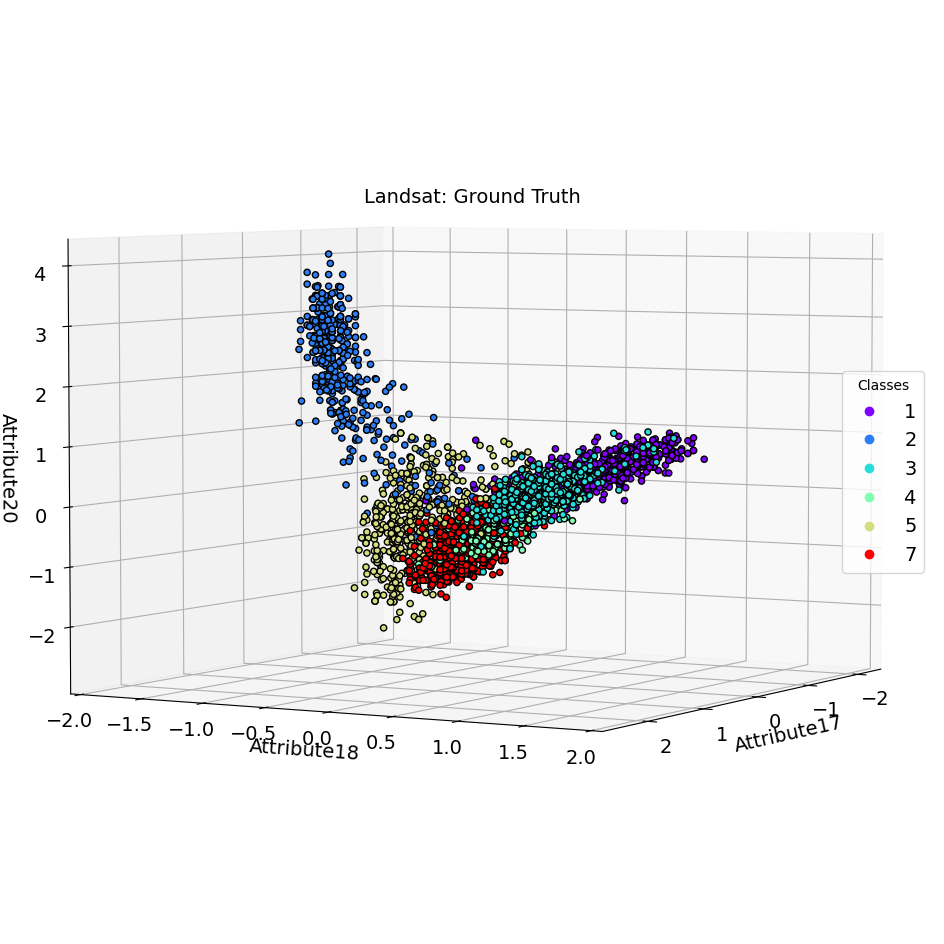

In [82]:
# Plot clusters
method = 'Ground Truth'
cluster_labels = y_train

elev=4
azim=30

fig = plt.figure(1, figsize=(12, 12))
ax = fig.add_subplot(111,projection="3d", elev=elev, azim=azim)

plot3d_features = ["Attribute17", "Attribute18", "Attribute20"]
col_X = [list(X_df.columns).index(x) for x in plot3d_features]
(X0, X1, X2) = (X_train[:, col_X[0]], X_train[:, col_X[1]], X_train[:, col_X[2]])
scatter = ax.scatter(X0, X1, X2, c=cluster_labels, cmap='rainbow', edgecolor="k", alpha=1)

fontsize=14
ax.set_xlabel(plot3d_features[0], fontsize=fontsize) 
ax.set_ylabel(plot3d_features[1], fontsize=fontsize) 
ax.set_zlabel(plot3d_features[2], fontsize=fontsize) 
ax.legend(scatter.legend_elements()[0], [f'{c}' for c in set(cluster_labels)], loc='center right', title="Classes",fontsize=fontsize)
plt.rcParams['axes.titley'] = 0.85
ax.set_ylim((-2,2))
ax.set_title(f"{data_name}: {method}", fontsize=fontsize)
#plt.subplots_adjust(wspace=0.25, hspace=0.25)
ax.tick_params(labelsize=fontsize)
#ax.legend(fontsize=fontsize)
plt.show()
plt.close(fig)
fig.savefig('Landsat_ground_truth.png')


In [161]:
## GMM

X_train = X_train_orig

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 11),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(max_iter=1000, tol=1e-4, n_init=10, random_state=seed), param_grid=param_grid, scoring=gmm_bic_score, n_jobs=8
)
grid_search.fit(X_train)

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

Number of components Type of covariance    BIC score
31                    2               full  3769.919111
15                    6               tied  6208.449235
17                    8               tied  6312.504447
18                    9               tied  6403.602604
16                    7               tied  6417.858652

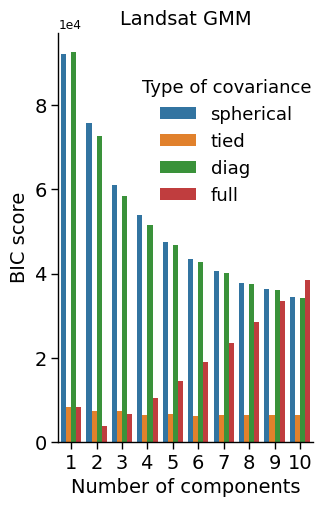

In [227]:
sns.reset_defaults()
sns.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":14, 'legend.fontsize': 13, 'legend.title_fontsize': 13})
ax=sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
    height=5, aspect=.8
)
sns.move_legend(ax, "upper right", bbox_to_anchor=(.70, 0.9))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.title('Landsat GMM')
plt.tick_params(labelsize=fontsize) 
plt.xticks(fontsize=14)
plt.show()
ax.savefig('Landsat_bic.png')


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

Train time 2.558104599942453
__________________________________________________________________________________
algo		components	homo	compl	v-meas	ARI	AMI	silhouette
gmm      	n_comp=2 	0.209	0.644	0.316	0.180	0.316	0.269


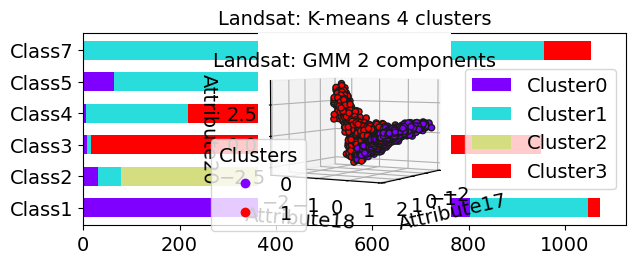

In [413]:
X_train = X_train_orig
X_test = X_test_orig

# Predict clusters
method='GMM'
n_clusters=2
covariance_type='full'

tic = time.perf_counter()
gm = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type, max_iter=1000, tol=1e-4, n_init=10, random_state=seed).fit(X_train)
toc = time.perf_counter()
print('Train time', toc-tic)

gm_labels = gm.predict(X_train)


      
cluster_labels = gm_labels

results=['gmm', f'n_comp={n_clusters}']
# Define the metrics which require only the true labels and estimator labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]
results += [m(y_train, cluster_labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [metrics.silhouette_score(X_train, cluster_labels)]
# Show the results
formatter_result = (
    "{:9s}\t{:9s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(82 * "_")
print("algo\t\tcomponents\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))
# --------------------------------------------------------------------------------
#
# Plot clusters
fontsize = 14

elev=4
azim=30

fig = plt.figure(1, figsize=(11.5, 11.5))
ax = fig.add_subplot(111,projection="3d", elev=elev, azim=azim)
plt.rcdefaults()
plot3d_features = ["Attribute17", "Attribute18", "Attribute20"]
col_X = [list(X_df.columns).index(x) for x in plot3d_features]
(X0, X1, X2) = (X_train[:, col_X[0]], X_train[:, col_X[1]], X_train[:, col_X[2]])
scatter = ax.scatter(X0, X1, X2, c=cluster_labels, cmap='rainbow', edgecolor="k", alpha=1)

ax.set_xlabel(plot3d_features[0], fontsize=fontsize)
ax.set_ylabel(plot3d_features[1], fontsize=fontsize,loc = "bottom")
ax.set_zlabel(plot3d_features[2], fontsize=fontsize)
ax.legend(scatter.legend_elements()[0], [f'{c}' for c in set(cluster_labels)], bbox_to_anchor=(0.3,0.5), title="Clusters", fontsize=fontsize,title_fontsize=fontsize)
plt.rcParams['axes.titley'] = 0.85
ax.set_xlim((-2., 2.))
ax.set_ylim((-2.5,1.0))
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([-2, -1, 0, 1])
ax.set_title(f"{data_name}: {method} {n_clusters} components", fontsize=fontsize)
ax.tick_params(labelsize=fontsize, direction='in', length=3, width=2, colors='black')
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()
fig.savefig(f'{data_name}_{method}_{n_clusters}clusters.png')
#
## Bar plot counts
#true_classes = list(set(y_train))
#df_counts = pd.DataFrame(index=[f'Class{c}' for c in true_classes])
#for cluster in set(cluster_labels): 
#    unique_values, counts = np.unique(y_train[cluster_labels==cluster], return_counts=True)
#    temp = [0]*len(true_classes)
#    for i in range(len(unique_values)):
#        temp[true_classes.index(unique_values[i])] = counts[i]    
#    df_counts[f'Cluster{cluster}'] = temp
#ax = df_counts.plot.barh(stacked=True, width=0.6, cmap='rainbow',figsize=(7, 2.5))
#plt.rcParams['axes.titley'] = 1.0
#ax.set_title(f"{data_name}: {method} {n_clusters} clusters", fontsize=fontsize)
#ax.tick_params(labelsize=fontsize)
#ax.legend(fontsize=fontsize)
#plt.savefig(f'{data_name}_{method}_{n_clusters}clusters_barplot.png')


# Predict test set
pred_test_labels = gm.predict(X_test)

np.savetxt(f"{data_name}_{method}_{n_clusters}k_train_labels_{case}.csv", gm.predict_proba(X_train))
np.savetxt(f"{data_name}_{method}_{n_clusters}k_test_labels_{case}.csv" , gm.predict_proba(X_test))



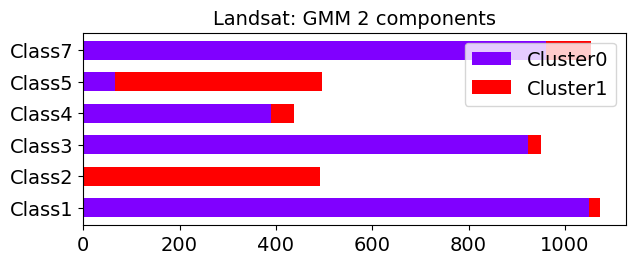

In [261]:
## Bar plot counts
true_classes = list(set(y_train))
df_counts = pd.DataFrame(index=[f'Class{c}' for c in true_classes])
for cluster in set(cluster_labels): 
    unique_values, counts = np.unique(y_train[cluster_labels==cluster], return_counts=True)
    temp = [0]*len(true_classes)
    for i in range(len(unique_values)):
        temp[true_classes.index(unique_values[i])] = counts[i]    
    df_counts[f'Cluster{cluster}'] = temp
ax = df_counts.plot.barh(stacked=True, width=0.6, cmap='rainbow',figsize=(7, 2.5))
plt.rcParams['axes.titley'] = 1.0
ax.set_title(f"{data_name}: {method} {n_clusters} components", fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize)
plt.savefig(f'{data_name}_{method}_{n_clusters}clusters_barplot.png')
plt.show()

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

__________________________________________________________________________________
algo		components	homo	compl	v-meas	ARI	AMI	silhouette
gmm      	n_comp=6 	0.529	0.589	0.557	0.467	0.557	0.087


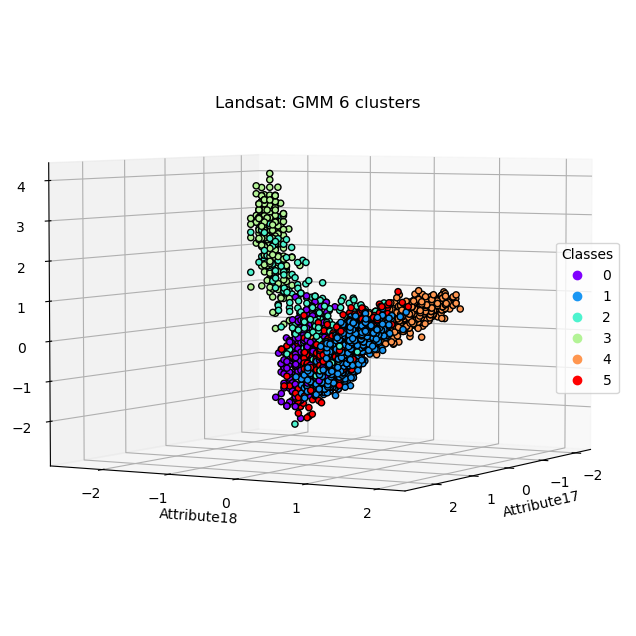

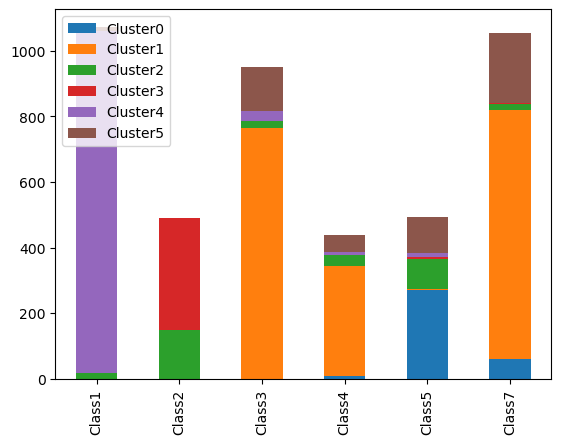

In [43]:
X_train = X_train_orig
X_test = X_test_orig

# Predict clusters
method='GMM'
n_clusters=6
covariance_type='full'

gm = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type, max_iter=1000, tol=1e-4, n_init=10, random_state=seed).fit(X_train)
gm_labels = gm.predict(X_train)

cluster_labels = gm_labels

results=['gmm', f'n_comp={n_clusters}']
# Define the metrics which require only the true labels and estimator labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]
results += [m(y_train, cluster_labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [metrics.silhouette_score(X_train, cluster_labels)]
# Show the results
formatter_result = (
    "{:9s}\t{:9s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(82 * "_")
print("algo\t\tcomponents\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))

# --------------------------------------------------------------------------------
#
# Plot clusters
elev=4
azim=30

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111,projection="3d", elev=elev, azim=azim)

plot3d_features = ["Attribute17", "Attribute18", "Attribute20"]
col_X = [list(X_df.columns).index(x) for x in plot3d_features]
(X0, X1, X2) = (X_train[:, col_X[0]], X_train[:, col_X[1]], X_train[:, col_X[2]])
scatter = ax.scatter(X0, X1, X2, c=cluster_labels, cmap='rainbow', edgecolor="k", alpha=1)

ax.set_xlabel(plot3d_features[0])
ax.set_ylabel(plot3d_features[1])
ax.set_zlabel(plot3d_features[2])
ax.legend(scatter.legend_elements()[0], [f'{c}' for c in set(cluster_labels)], loc='center right', title="Classes")
plt.rcParams['axes.titley'] = 0.9
#ax.set_ylim((-0.9,-0.6))
ax.set_title(f"{data_name}: {method} {n_clusters} clusters")
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

#
# Bar plot counts
true_classes = list(set(y_train))
df_counts = pd.DataFrame(index=[f'Class{c}' for c in true_classes])
for cluster in set(cluster_labels): 
    unique_values, counts = np.unique(y_train[cluster_labels==cluster], return_counts=True)
    temp = [0]*len(true_classes)
    for i in range(len(unique_values)):
        temp[true_classes.index(unique_values[i])] = counts[i]    
    df_counts[f'Cluster{cluster}'] = temp
ax = df_counts.plot.bar(stacked=True)
#
#
# Predict test set
pred_test_labels = gm.predict(X_test)

np.savetxt(f"{data_name}_{method}_{n_clusters}k_train_labels_{case}.csv", gm.predict_proba(X_train))
np.savetxt(f"{data_name}_{method}_{n_clusters}k_test_labels_{case}.csv" , gm.predict_proba(X_test))

In [ ]:



method='GMM'
n_clusters=2
covariance_type='full'

gm = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type, max_iter=1000, tol=1e-4, n_init=10, random_state=seed).fit(X_train)
tic = time.perf_counter()
gm_labels = gm.predict(X_train)
toc = time.perf_counter()
print('Train time', toc-tic)

### Dimensionality Reduction

#### 1) PCA

C:\Users\akoutras\AppData\Local\Temp\ipykernel_19572\3997966127.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  ax.plot([0, 38], [0.95, 0.95],'--r',linewidth=2,color='red')


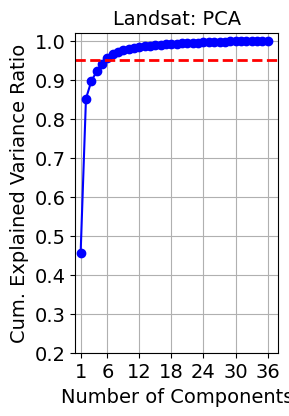

In [307]:
# PCA
X_train = X_train_orig
pca_components = X_train.shape[1]
pca = PCA(n_components=pca_components, random_state=seed)
pca.fit(X_train)
    
explained_variance_ratio = pca.explained_variance_ratio_
cum_explained_variance_ratio = explained_variance_ratio.cumsum()

fontsize = 14
fig = plt.figure(figsize=(2.9,4))

ax = fig.add_axes([0.24, 0.14, 0.7, 0.80])
ax.plot(range(1, pca_components+1), cum_explained_variance_ratio,'-o', color='blue')
ax.plot([0, 38], [0.95, 0.95],'--r',linewidth=2,color='red')
ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat: PCA', fontsize=fontsize)
ax.set_xlabel('Number of Components', fontsize=fontsize) 
ax.set_ylabel('Cum. Explained Variance Ratio', fontsize=fontsize)
ax.set_xticks([1]+list(range(6,42,6)))
ax.set_yticks(np.arange(0.2,1.1,0.1))
ax.set_xlim((0,38))
ax.set_ylim((0.2,1.02))
plt.rcParams['axes.titley'] = 1.
plt.grid(True)
plt.show()
fig.savefig('Landsat_PCA_explained_variance.png')
plt.close(fig)




In [17]:
# Determine the number of components to use using the explained variance criterion
explained_variance = np.var(pca.transform(X_train), axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
n_components = np.argmax(np.cumsum(explained_variance_ratio) >= 0.95) + 1

print(explained_variance_ratio)
print(n_components)
np.cumsum(explained_variance_ratio)

[4.55118166e-01 3.95992212e-01 4.46202739e-02 2.49879765e-02
 1.83304956e-02 1.67213970e-02 1.02754548e-02 5.39583993e-03
 3.77774491e-03 3.54801036e-03 2.33703683e-03 1.87851448e-03
 1.75486906e-03 1.60120209e-03 1.25424331e-03 1.23859180e-03
 1.11599509e-03 1.01509060e-03 8.20614891e-04 7.66755991e-04
 7.50360188e-04 6.98590353e-04 6.34236051e-04 5.73779210e-04
 5.31586623e-04 5.21234647e-04 5.00514166e-04 4.82478285e-04
 4.33954578e-04 4.10377434e-04 4.07078025e-04 3.49823473e-04
 3.44642328e-04 2.97998230e-04 2.79767432e-04 2.33094055e-04]
6


array([0.45511817, 0.85111038, 0.89573065, 0.92071863, 0.93904912,
       0.95577052, 0.96604598, 0.97144182, 0.97521956, 0.97876757,
       0.98110461, 0.98298312, 0.98473799, 0.98633919, 0.98759344,
       0.98883203, 0.98994802, 0.99096311, 0.99178373, 0.99255048,
       0.99330085, 0.99399944, 0.99463367, 0.99520745, 0.99573904,
       0.99626027, 0.99676079, 0.99724326, 0.99767722, 0.9980876 ,
       0.99849467, 0.9988445 , 0.99918914, 0.99948714, 0.99976691,
       1.        ])

Time to train 0.007753400015644729
Normalized reconstruction error 0.210308057952471


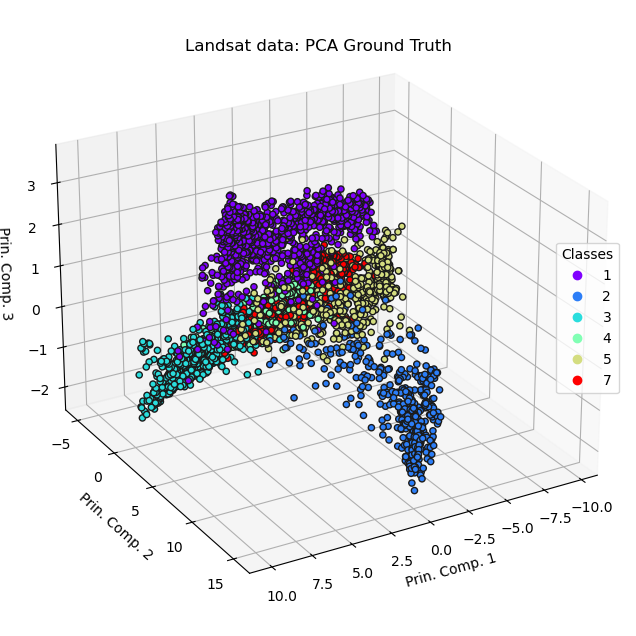

In [323]:
X_train = X_train_orig

# SELECT COMPONENTS
pca_components = 6
pca = PCA(n_components=pca_components, random_state=seed)

tic = time.perf_counter()
pca.fit(X_train)
toc = time.perf_counter()
print('Time to train', toc-tic)

X_train_pca = pca.transform(X_train)

X_train_rec = X_train_pca @ (pca.components_)
norm_error = np.linalg.norm(X_train - X_train_rec)/np.linalg.norm(X_train)
print('Normalized reconstruction error', norm_error)


fig = plt.figure(1, figsize=(8, 8))

ax = fig.add_subplot(111,projection="3d", elev=25, azim=60)

scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='rainbow', edgecolor="k", alpha=1)

ax.legend(scatter.legend_elements()[0], ['1','2','3','4','5','7'], loc='center right', title="Classes")

plt.rcParams['axes.titley'] = 1.0

#ax.set_ylim((-2,10))
ax.set_xlabel("Prin. Comp. 1")
ax.set_ylabel("Prin. Comp. 2")
ax.set_zlabel("Prin. Comp. 3")
ax.set_title("Landsat data: PCA Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

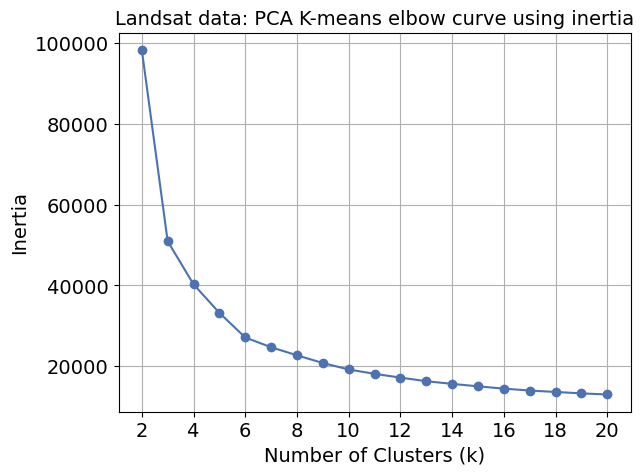

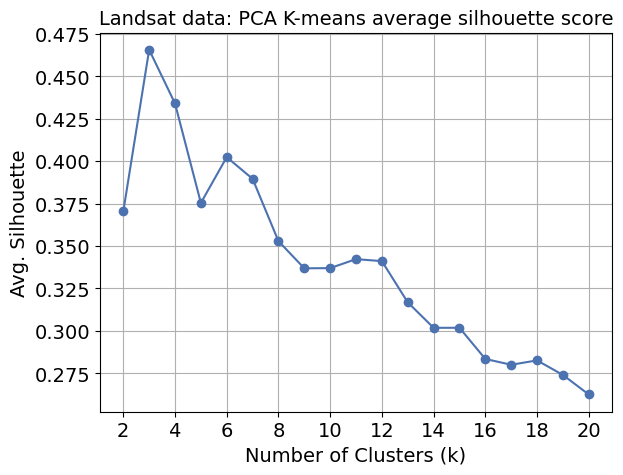

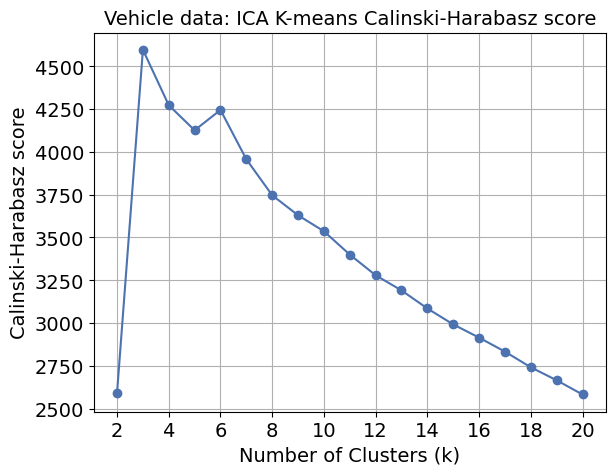

In [325]:
max_clusters = 20
inertias, silhouette_avg_scores, ch_scores = kmeans_tuning(X_train_pca, max_clusters, seed)
range_n_clusters = list(range(2, max_clusters+1))

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range_n_clusters, inertias,'-o', color='b')

ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat data: PCA K-means elbow curve using inertia', fontsize=fontsize)
ax.set_xlabel('Number of Clusters (k)', fontsize=fontsize) 
ax.set_ylabel('Inertia', fontsize=fontsize)
ax.set_xticks(range(2,22,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range_n_clusters, silhouette_avg_scores,'-o', color='b')

ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat data: PCA K-means average silhouette score', fontsize=fontsize)
ax.set_xlabel('Number of Clusters (k)', fontsize=fontsize) 
ax.set_ylabel('Avg. Silhouette', fontsize=fontsize)
ax.set_xticks(range(2,22,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range_n_clusters, ch_scores,'-o', color='b')

ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data: ICA K-means Calinski-Harabasz score', fontsize=fontsize)
ax.set_xlabel('Number of Clusters (k)', fontsize=fontsize) 
ax.set_ylabel('Calinski-Harabasz score', fontsize=fontsize)
ax.set_xticks(range(2,22,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)


K=3


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.46560740358909947


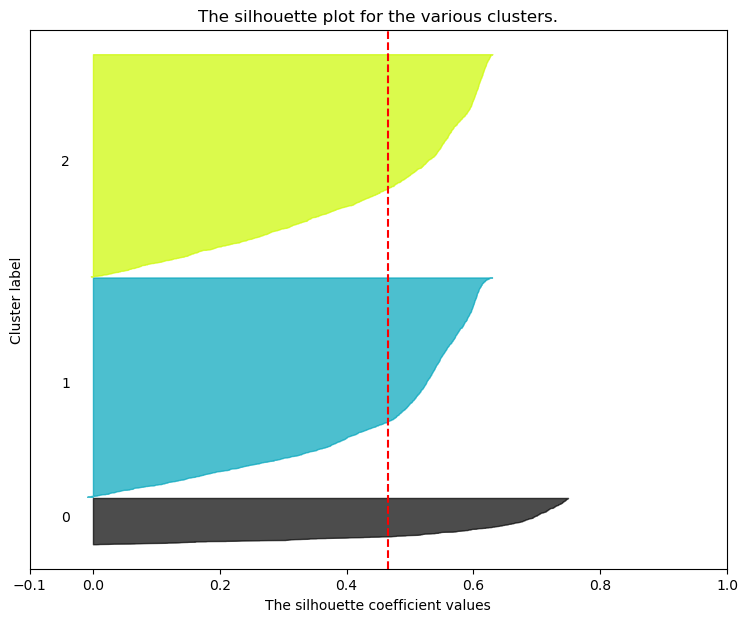

K=4


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.4339623901275098


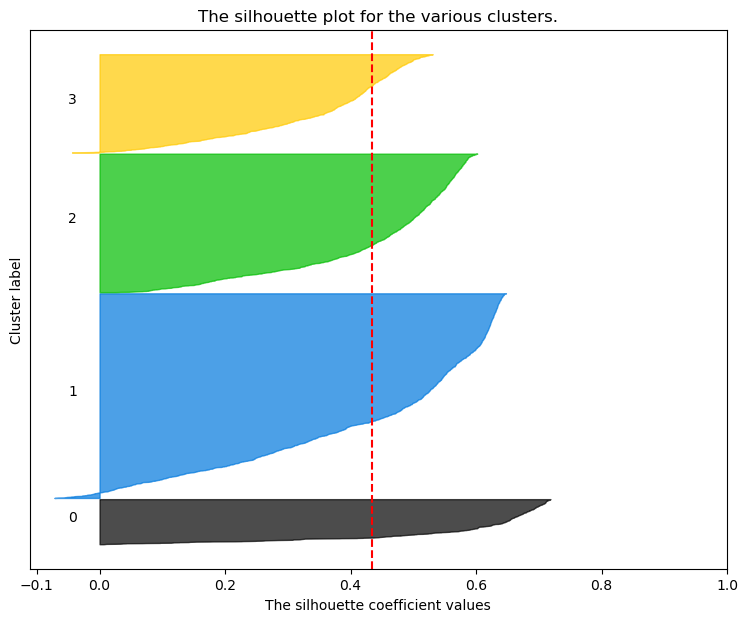

K=5


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.37499830760878117


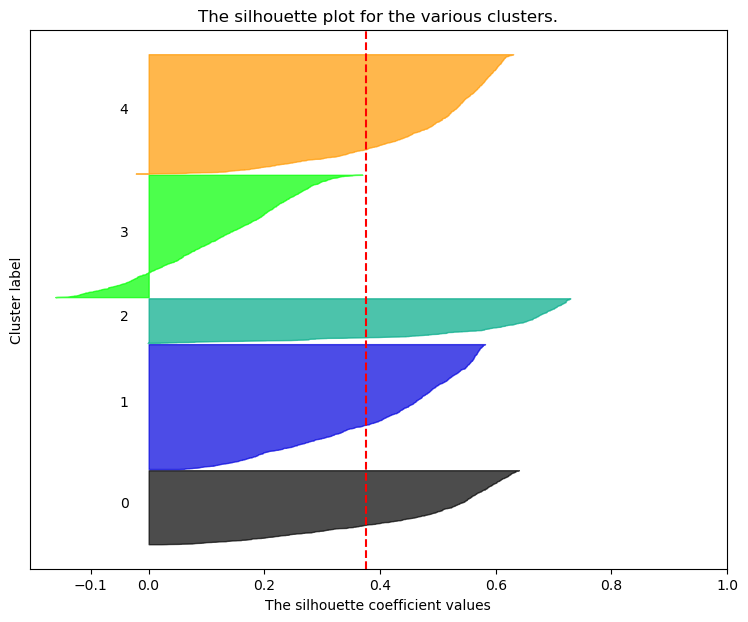

K=6


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.40235036168659427


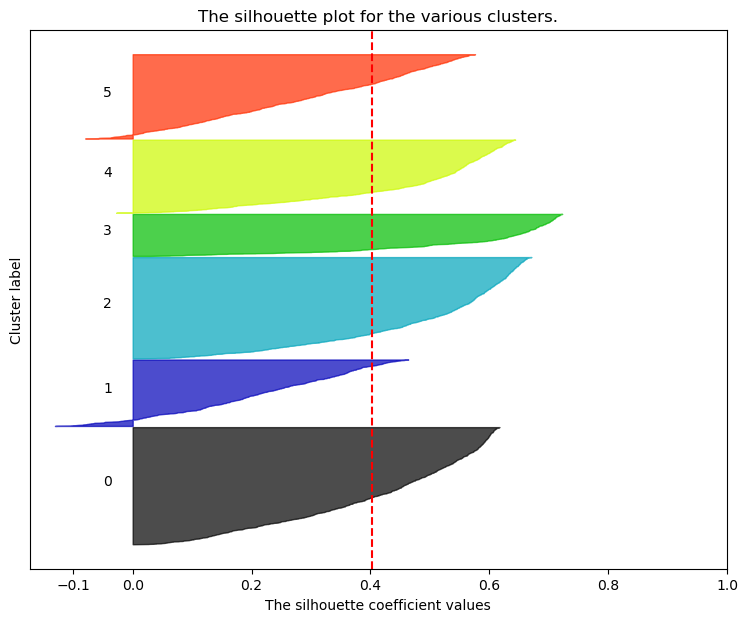

In [326]:
X = X_train_pca

range_n_clusters = list(range(3, 7))

for n_clusters in range_n_clusters:
    
    print(f'K={n_clusters}')
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1000, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    y_lower = 10
                                                  
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()
    #fig.savefig('rhc_effect_max_attempts.png')
    plt.close(fig)

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


Train time 0.32923909998498857
__________________________________________________________________________________
algo		inertia		homo	compl	v-meas	ARI	AMI	silhouette
K=4      	40267.226	0.486	0.661	0.560	0.459	0.559	0.434


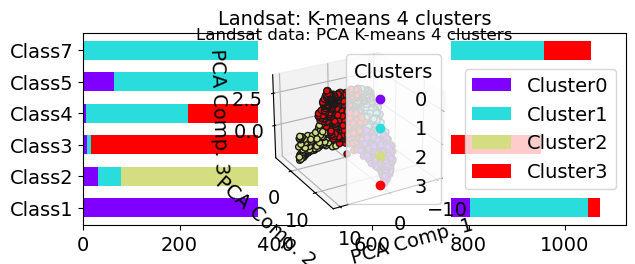

In [399]:
# Kmeans training with K=3
X = X_train_pca
n_clusters=4

tic = time.perf_counter()
kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1000, n_init=10).fit(X)
toc = time.perf_counter()
print('Train time', toc-tic)

cluster_labels = kmeans.predict(X)

results=[f'K={n_clusters}', kmeans.inertia_]
# Define the metrics which require only the true labels and estimator labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]
results += [m(y_train, cluster_labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [metrics.silhouette_score(X, cluster_labels)]
# Show the results
formatter_result = (
    "{:9s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(82 * "_")
print("algo\t\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))
#
#
fontsize = 14

elev=25
azim=60
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111,projection="3d", elev=elev, azim=azim)
#ax = fig.add_subplot(111,projection="3d", elev=25, azim=60)
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster_labels, cmap='rainbow', edgecolor="k", alpha=1)

ax.legend(scatter.legend_elements()[0], [f'{c}' for c in set(cluster_labels)], loc='center right', title="Clusters", fontsize=fontsize,title_fontsize=fontsize)
plt.rcParams['axes.titley'] = 1.0
#ax.set_ylim((-2.5,1.5))
ax.set_title(f"{data_name}: {method} {n_clusters} clusters", fontsize=fontsize)
ax.tick_params(labelsize=fontsize, direction='in', length=3, width=2, colors='black')

#ax.set_ylim((-2,10))
ax.set_xlabel("PCA Comp. 1", fontsize=fontsize)
ax.set_ylabel("PCA Comp. 2", fontsize=fontsize)
ax.set_zlabel("PCA Comp. 3", fontsize=fontsize)
ax.set_title(f"Landsat data: PCA K-means {n_clusters} clusters")
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()


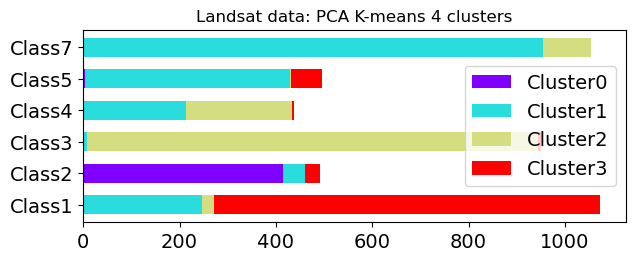

In [357]:
true_classes = list(set(y_train))
df_counts = pd.DataFrame(index=[f'Class{c}' for c in true_classes])
for cluster in set(cluster_labels): 
    unique_values, counts = np.unique(y_train[cluster_labels==cluster], return_counts=True)
    temp = [0]*len(true_classes)
    for i in range(len(unique_values)):
        temp[true_classes.index(unique_values[i])] = counts[i]    
    df_counts[f'Cluster{cluster}'] = temp
ax = df_counts.plot.barh(stacked=True, width=0.6, cmap='rainbow',figsize=(7, 2.5))
plt.rcParams['axes.titley'] = 1.0
ax.set_title(f"Landsat data: PCA K-means {n_clusters} clusters")
ax.tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize)
plt.show()
#plt.savefig(f'{data_name}_{method}_{n_clusters}clusters_barplot.png')

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


__________________________________________________________________________________
algo		inertia		homo	compl	v-meas	ARI	AMI	silhouette
K=6      	27097.008	0.616	0.608	0.612	0.530	0.611	0.402


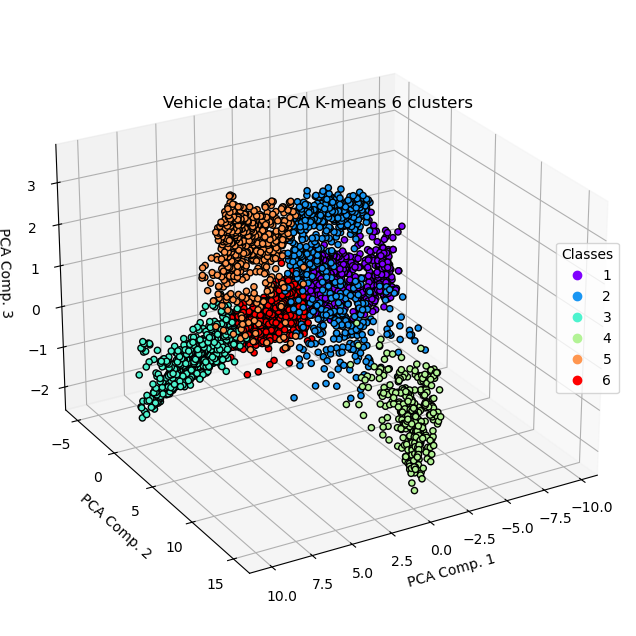

In [103]:
# Kmeans training with K=3
X = X_train_pca
n_clusters=6

kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1000, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

results=[f'K={n_clusters}', kmeans.inertia_]
# Define the metrics which require only the true labels and estimator labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]
results += [m(y_train, kmeans_labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [metrics.silhouette_score(X, kmeans_labels)]
# Show the results
formatter_result = (
    "{:9s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(82 * "_")
print("algo\t\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))


fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111,projection="3d", elev=25, azim=60)

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans_labels, cmap='rainbow', edgecolor="k", alpha=1)

ax.legend(scatter.legend_elements()[0], ['1', '2', '3', '4', '5', '6'], loc='center right', title="Classes")

plt.rcParams['axes.titley'] = 0.9

#ax.set_ylim((-2,10))
ax.set_xlabel("PCA Comp. 1")
ax.set_ylabel("PCA Comp. 2")
ax.set_zlabel("PCA Comp. 3")
ax.set_title(f"Vehicle data: PCA K-means {n_clusters} clusters")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

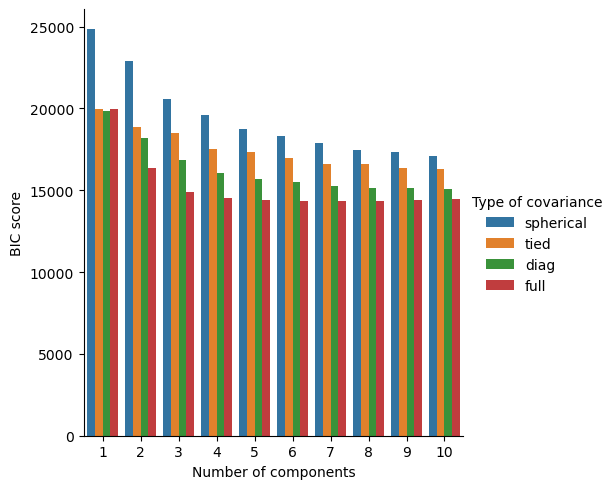

Number of components Type of covariance     BIC score
36                    7               full  14339.147972
37                    8               full  14350.104412
35                    6               full  14362.880628
38                    9               full  14391.913366
34                    5               full  14403.269671

In [344]:
## GMM
X = X_train_pca

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 11),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(max_iter=1000, tol=1e-4, n_init=10, random_state=seed), param_grid=param_grid, scoring=gmm_bic_score, n_jobs=8
)
grid_search.fit(X)

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

df.sort_values(by="BIC score").head()

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

Train time 1.5443125000456348
__________________________________________________________________________________
algo		components	homo	compl	v-meas	ARI	AMI	silhouette
gmm      	n_comp=4 	0.496	0.670	0.570	0.454	0.570	0.151


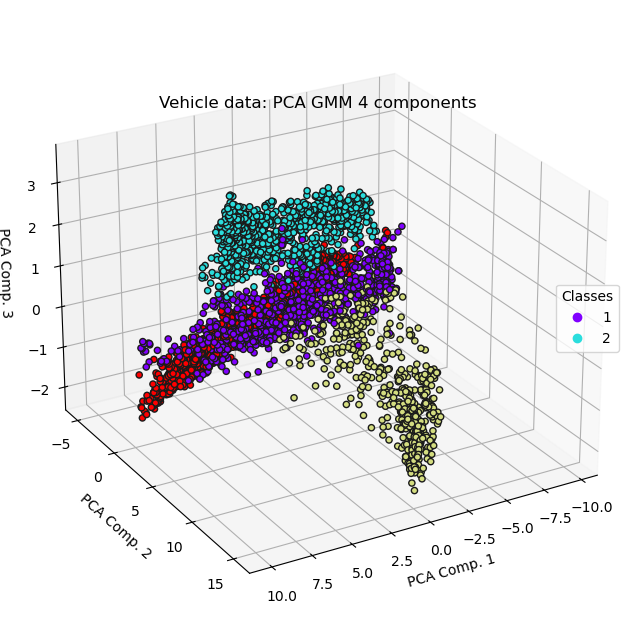

In [400]:
X = X_train_pca
n_components = 4
covariance_type='full'


tic = time.perf_counter()
gm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, max_iter=1000, tol=1e-4, n_init=10, random_state=seed).fit(X)
toc = time.perf_counter()
print('Train time', toc-tic)

gm_labels = gm.predict(X)

cluster_labels = gm_labels

results=['gmm', f'n_comp={n_components}']
# Define the metrics which require only the true labels and estimator labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]
results += [m(y_train, cluster_labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [metrics.silhouette_score(X, cluster_labels)]
# Show the results
formatter_result = (
    "{:9s}\t{:9s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(82 * "_")
print("algo\t\tcomponents\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))

fig = plt.figure(1, figsize=(8, 8))

ax = fig.add_subplot(111,projection="3d", elev=25, azim=60)

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=gm_labels, cmap='rainbow', edgecolor="k", alpha=1)

ax.legend(scatter.legend_elements()[0], ['1', '2'], loc='center right', title="Classes")

plt.rcParams['axes.titley'] = 0.9

#ax.set_ylim((-2,10))
ax.set_xlabel("PCA Comp. 1")
ax.set_ylabel("PCA Comp. 2")
ax.set_zlabel("PCA Comp. 3")
ax.set_title(f"Vehicle data: PCA GMM {n_components} components")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

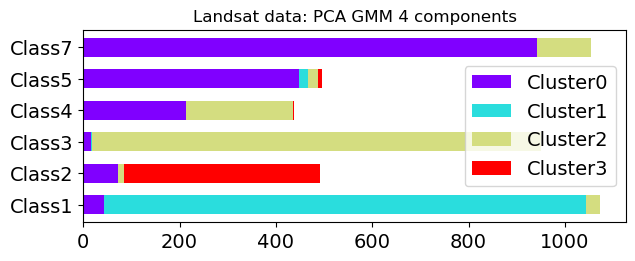

In [355]:
## Bar plot counts
true_classes = list(set(y_train))
df_counts = pd.DataFrame(index=[f'Class{c}' for c in true_classes])
for cluster in set(cluster_labels): 
    unique_values, counts = np.unique(y_train[cluster_labels==cluster], return_counts=True)
    temp = [0]*len(true_classes)
    for i in range(len(unique_values)):
        temp[true_classes.index(unique_values[i])] = counts[i]    
    df_counts[f'Cluster{cluster}'] = temp
ax = df_counts.plot.barh(stacked=True, width=0.6, cmap='rainbow',figsize=(7, 2.5))
plt.rcParams['axes.titley'] = 1.0
ax.set_title(f"{data_name}: {method} {n_clusters} components", fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize)
ax.set_title(f"Landsat data: PCA GMM {n_components} components")
plt.show()

### 2) ICA

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


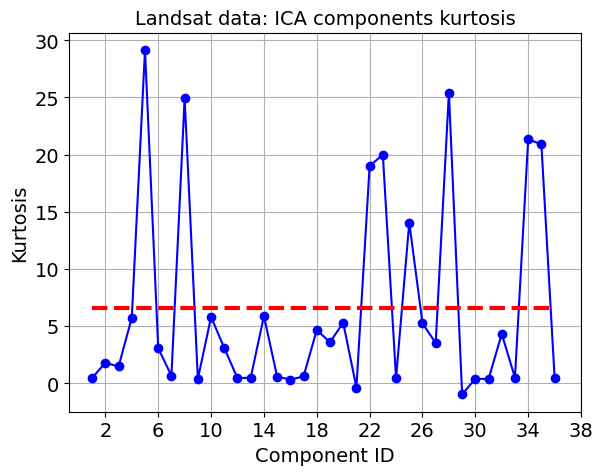

[ 3  4  7  9 13 17 19 21 22 24 25 27 31 33 34]
(15, 36)


In [21]:
X_train=X_train_orig
ica_components = X_train.shape[1]
#ica_components = 10
ica = FastICA(n_components=ica_components, random_state=seed)
X_train_ica = ica.fit_transform(X_train)  

kurtosis_scores = [kurtosis(X_train_ica[:, i]) for i in range(X_train_ica.shape[1])]

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range(1, ica_components+1), kurtosis_scores,'-o', color='b')
ax.plot([1, 36], [np.mean(np.abs(kurtosis_scores)), np.mean(np.abs(kurtosis_scores))],'--r',linewidth=3)
ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat data: ICA components kurtosis', fontsize=fontsize)
ax.set_xlabel('Component ID', fontsize=fontsize) 
ax.set_ylabel('Kurtosis', fontsize=fontsize)
ax.set_xticks(range(2,40,4))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

threshold = np.mean(np.abs(kurtosis_scores))
threshold = 4

selected_indices = np.where(np.abs(kurtosis_scores) > threshold)[0]
print(selected_indices)

X_train_ica = X_train_ica[:, selected_indices]

C_matrix = ica.components_[selected_indices, :]

print(C_matrix.shape)

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


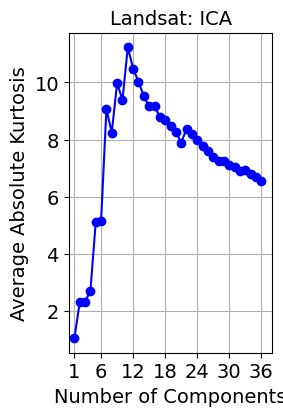

Maximum avg. kurtosis at number of components: 11


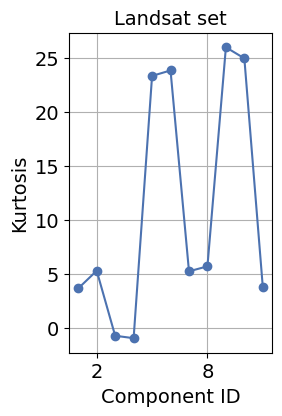

Time to train 0.045604599989019334
Normalized reconstruction error 0.13746051209899154


In [321]:
# 2nd approach take mean of kurtosis
X_train = X_train_orig

aver_kurt = []
for ica_components in range(1,X_train.shape[1]+1):
    kurtosis_scores = []
    ica = FastICA(n_components=ica_components, random_state=seed)
    tmp = ica.fit_transform(X_train)
    kurtosis_scores = [np.abs(kurtosis(tmp[:, i])) for i in range(ica_components)]
    aver_kurt.append(np.mean(kurtosis_scores))

fontsize = 14
fig = plt.figure(figsize=(2.9,4))
ax = fig.add_axes([0.24, 0.14, 0.7, 0.80])
ax.plot(range(1,X_train.shape[1]+1), aver_kurt,'-o', color='blue')
ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat: ICA', fontsize=fontsize)
ax.set_xlabel('Number of Components', fontsize=fontsize) 
ax.set_ylabel('Average Absolute Kurtosis', fontsize=fontsize)
ax.set_xticks([1]+list(range(6,42,6)))
ax.set_xlim((0,38))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
fig.savefig('Landsat_ICA_kurtosis.png')
plt.close(fig)

ica_components = np.argmax(aver_kurt)+1
print(f'Maximum avg. kurtosis at number of components: {ica_components}')

ica2 = FastICA(n_components=ica_components, random_state=seed)
X_train_ica2 = ica2.fit_transform(X_train)  

kurtosis_scores = [kurtosis(X_train_ica2[:, i]) for i in range(X_train_ica2.shape[1])]

fontsize = 14
fig = plt.figure(figsize=(2.9,4))
ax = fig.add_axes([0.24, 0.14, 0.7, 0.80])
ax.plot(range(1, ica_components+1), kurtosis_scores,'-o', color='b')
ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat set', fontsize=fontsize)
ax.set_xlabel('Component ID', fontsize=fontsize) 
ax.set_ylabel('Kurtosis', fontsize=fontsize)
ax.set_xticks(range(2,X_train_ica2.shape[1]+1,6))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

ica2 = FastICA(n_components=11, random_state=seed)
tic = time.perf_counter()
ica2.fit(X_train) 
toc = time.perf_counter()
print('Time to train', toc-tic)
X_train_ica2 = ica2.transform(X_train) 
X_train_rec = X_train_ica2 @ np.transpose(ica2.mixing_)
norm_error = np.linalg.norm(X_train - X_train_rec)/np.linalg.norm(X_train)
print('Normalized reconstruction error', norm_error)


In [140]:
Xica1.shape

(4504,)

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

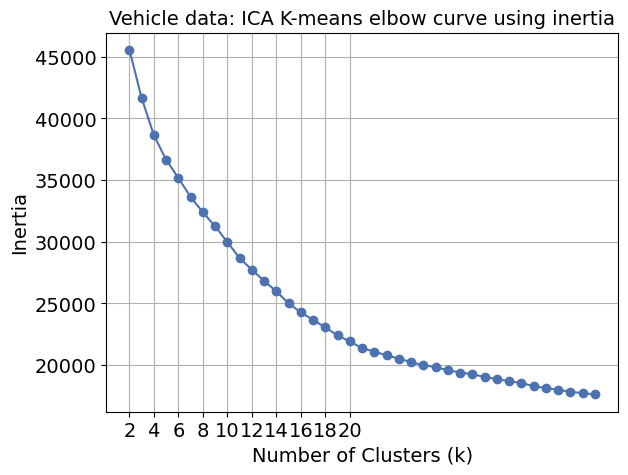

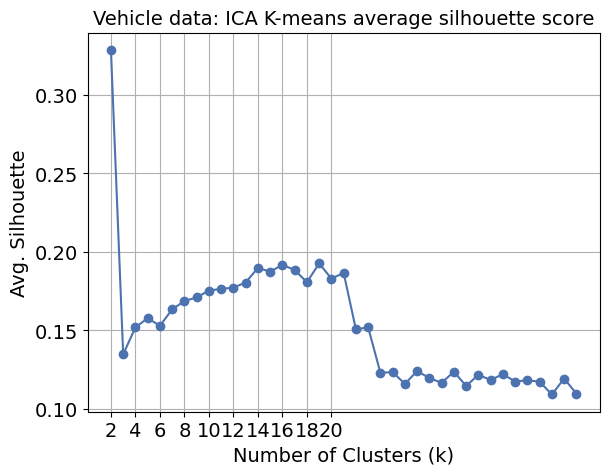

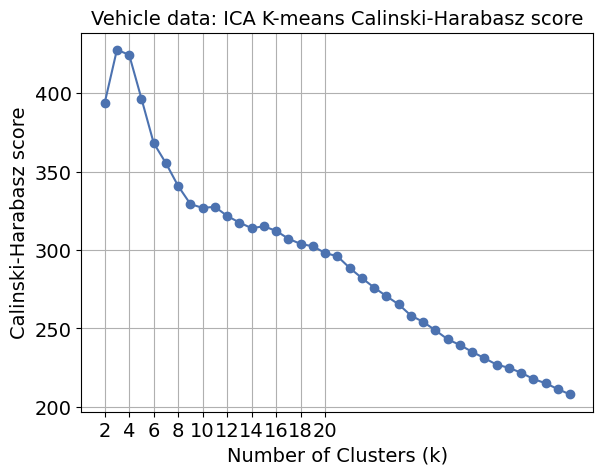

In [347]:
X = X_train_ica2

max_clusters = 40
inertias, silhouette_avg_scores, ch_scores = kmeans_tuning(X, max_clusters, seed)

range_n_clusters = list(range(2, max_clusters+1))

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range_n_clusters, inertias,'-o', color='b')

ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data: ICA K-means elbow curve using inertia', fontsize=fontsize)
ax.set_xlabel('Number of Clusters (k)', fontsize=fontsize) 
ax.set_ylabel('Inertia', fontsize=fontsize)
ax.set_xticks(range(2,22,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range_n_clusters, silhouette_avg_scores,'-o', color='b')

ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data: ICA K-means average silhouette score', fontsize=fontsize)
ax.set_xlabel('Number of Clusters (k)', fontsize=fontsize) 
ax.set_ylabel('Avg. Silhouette', fontsize=fontsize)
ax.set_xticks(range(2,22,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range_n_clusters, ch_scores,'-o', color='b')

ax.tick_params(labelsize=fontsize)
ax.set_title('Vehicle data: ICA K-means Calinski-Harabasz score', fontsize=fontsize)
ax.set_xlabel('Number of Clusters (k)', fontsize=fontsize) 
ax.set_ylabel('Calinski-Harabasz score', fontsize=fontsize)
ax.set_xticks(range(2,22,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

K=2


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.32864917559315043


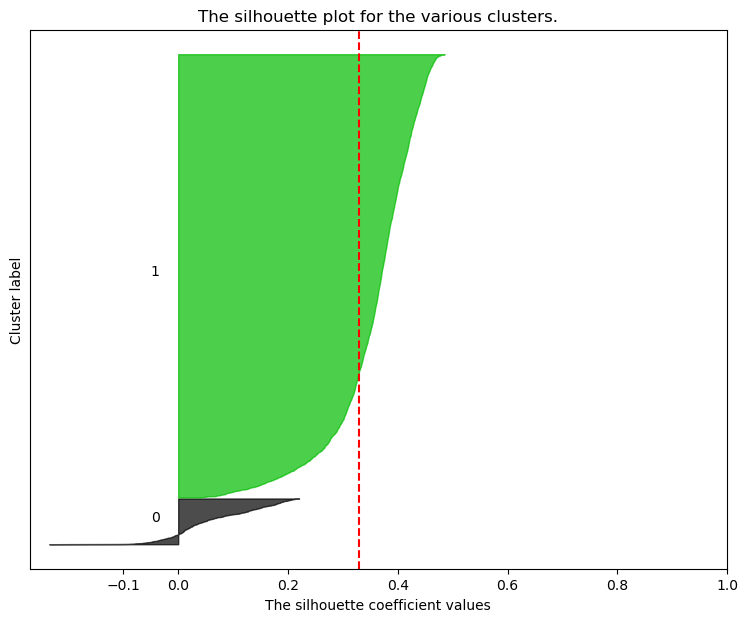

K=3


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.13091688677706068


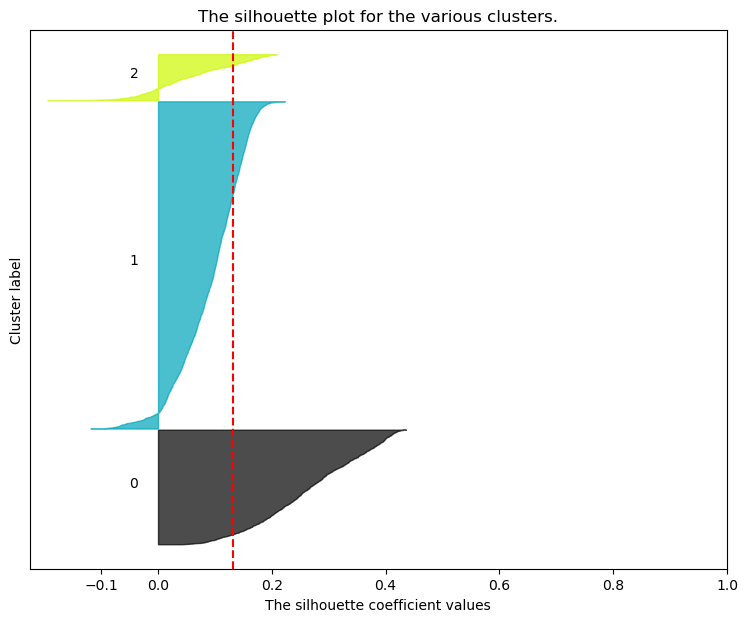

K=4


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.15174672371952058


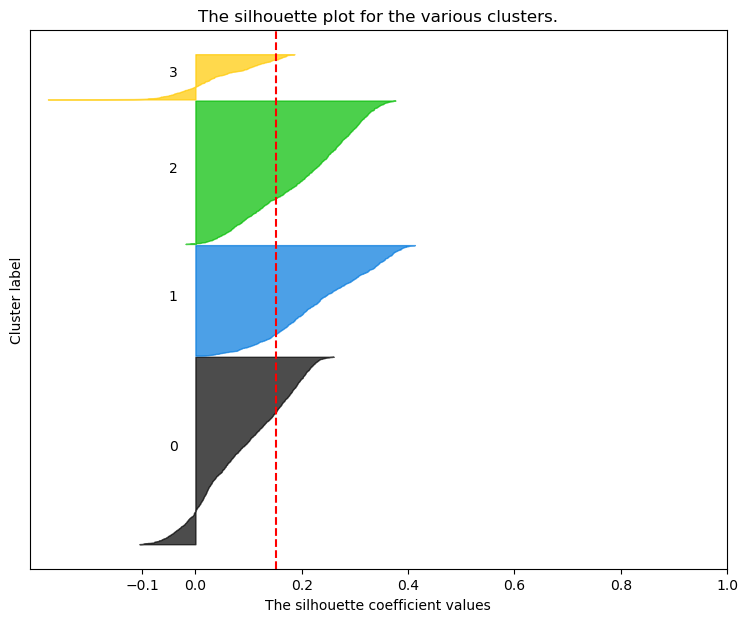

K=5


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.1586070864125198


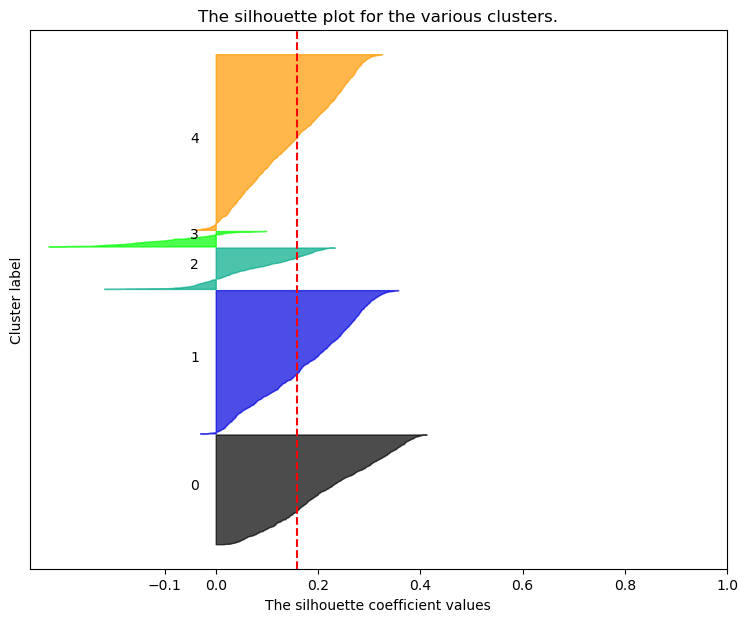

K=6


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.15270672535866384


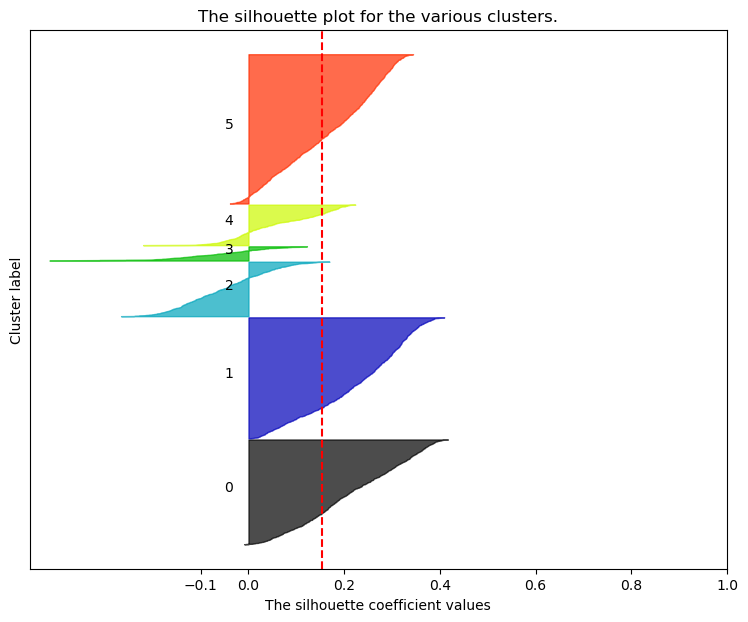

In [348]:
X = X_train_ica2

range_n_clusters = list(range(2, 7))

for n_clusters in range_n_clusters:
    
    print(f'K={n_clusters}')
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1000, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    y_lower = 10
                                                  
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()
    #fig.savefig('rhc_effect_max_attempts.png')
    plt.close(fig)

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


Train time 0.3464050000766292
__________________________________________________________________________________
algo		inertia		homo	compl	v-meas	ARI	AMI	silhouette
K=4      	38617.114	0.496	0.670	0.570	0.454	0.570	0.112


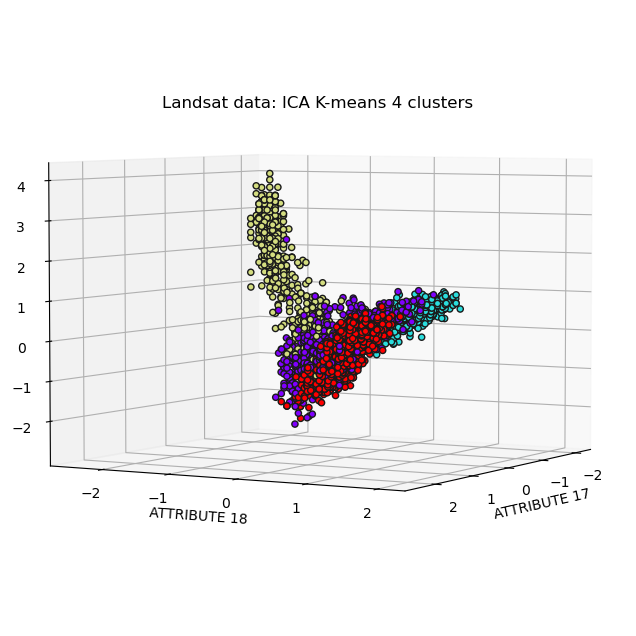

In [401]:

X = X_train_ica2
n_clusters=4

tic = time.perf_counter()
kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1000, n_init=10).fit(X)
toc = time.perf_counter()
print('Train time', toc-tic)

results=[f'K={n_clusters}', kmeans.inertia_]
# Define the metrics which require only the true labels and estimator labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]
results += [m(y_train, cluster_labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [metrics.silhouette_score(X, cluster_labels)]
# Show the results
formatter_result = (
    "{:9s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(82 * "_")
print("algo\t\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))

X_train = X_train_orig

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111,projection="3d", elev=4, azim=30)

scatter = ax.scatter(X_train[:, 16], X_train[:, 17], X_train[:, 19], c=cluster_labels, cmap='rainbow', edgecolor="k", alpha=1)

#ax.legend(scatter.legend_elements()[0], ['1', '2', '3', '4', '5', '6'], loc='center right', title="Classes")

plt.rcParams['axes.titley'] = 0.9

#ax.set_ylim((-2,10))
ax.set_xlabel("ATTRIBUTE 17")
ax.set_ylabel("ATTRIBUTE 18")
ax.set_zlabel("ATTRIBUTE 20")
ax.set_title(f"Landsat data: ICA K-means {n_clusters} clusters")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()


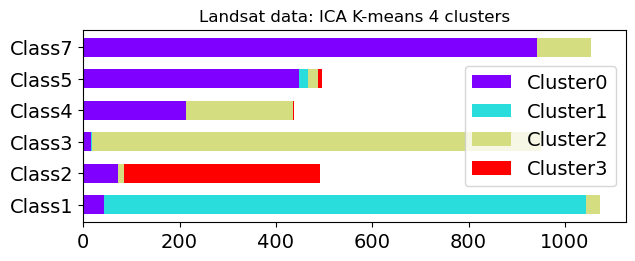

In [354]:
## Bar plot counts
true_classes = list(set(y_train))
df_counts = pd.DataFrame(index=[f'Class{c}' for c in true_classes])
for cluster in set(cluster_labels): 
    unique_values, counts = np.unique(y_train[cluster_labels==cluster], return_counts=True)
    temp = [0]*len(true_classes)
    for i in range(len(unique_values)):
        temp[true_classes.index(unique_values[i])] = counts[i]    
    df_counts[f'Cluster{cluster}'] = temp
ax = df_counts.plot.barh(stacked=True, width=0.6, cmap='rainbow',figsize=(7, 2.5))
plt.rcParams['axes.titley'] = 1.0
ax.set_title(f"Landsat data: ICA K-means {n_clusters} clusters")
ax.tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize)
plt.savefig(f'{data_name}_{method}_{n_clusters}clusters_barplot.png')
plt.show()

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

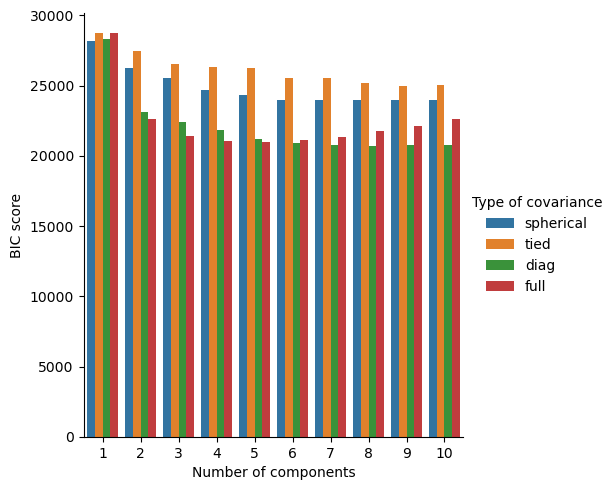

Number of components Type of covariance     BIC score
27                    8               diag  20722.497117
29                   10               diag  20756.288924
28                    9               diag  20763.812866
26                    7               diag  20777.610693
25                    6               diag  20909.314696

In [379]:
## GMM
X = X_train_ica2

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 11),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(max_iter=1000, tol=1e-4, n_init=10, random_state=seed), param_grid=param_grid, scoring=gmm_bic_score, n_jobs=8
)
grid_search.fit(X)

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

df.sort_values(by="BIC score").head()

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

Train time 2.4152952000731602
__________________________________________________________________________________
algo		components	homo	compl	v-meas	ARI	AMI	silhouette
gmm      	n_comp=4 	0.484	0.647	0.554	0.445	0.553	0.108


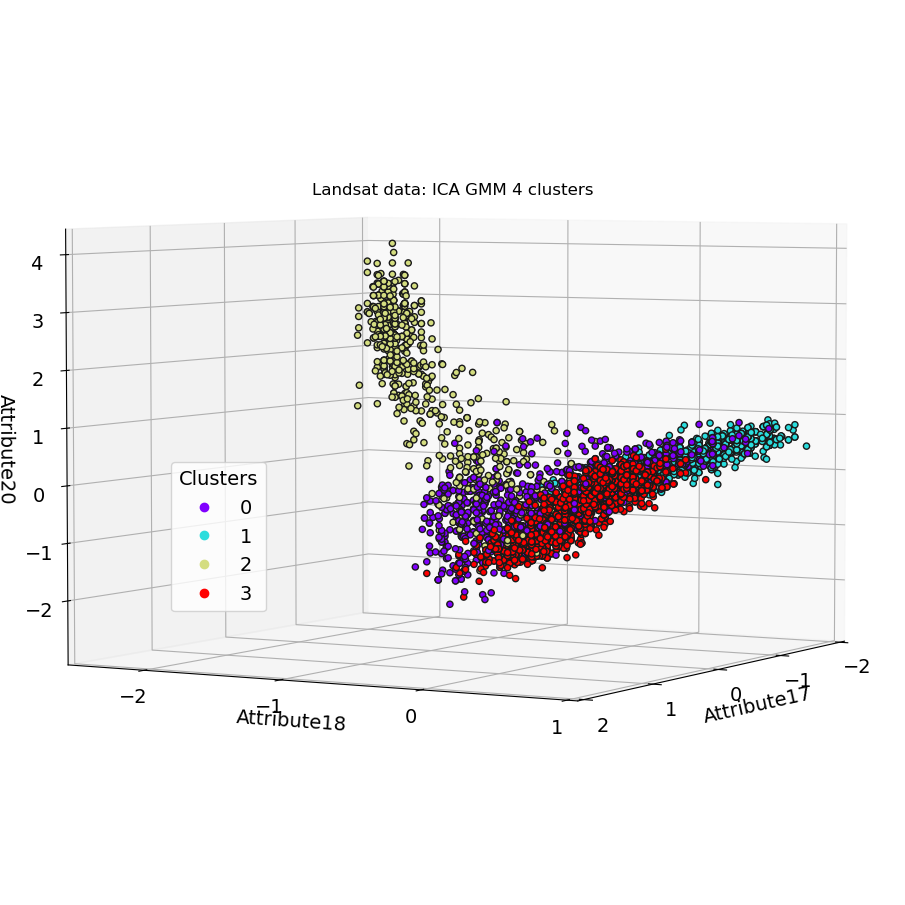

In [411]:
X = X_train_ica2

# Predict clusters
method='GMM'
n_clusters=4
covariance_type='full'

tic = time.perf_counter()
gm = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type, max_iter=1000, tol=1e-4, n_init=10, random_state=seed).fit(X)
toc = time.perf_counter()
print('Train time', toc-tic)

gm_labels = gm.predict(X)

      
cluster_labels = gm_labels

results=['gmm', f'n_comp={n_clusters}']
# Define the metrics which require only the true labels and estimator labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]
results += [m(y_train, cluster_labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [metrics.silhouette_score(X, cluster_labels)]
# Show the results
formatter_result = (
    "{:9s}\t{:9s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(82 * "_")
print("algo\t\tcomponents\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))
# --------------------------------------------------------------------------------
#

X_train = X_train_orig

# Plot clusters
fontsize = 14

elev=4
azim=30

fig = plt.figure(1, figsize=(11.5, 11.5))
ax = fig.add_subplot(111,projection="3d", elev=elev, azim=azim)
plt.rcdefaults()
plot3d_features = ["Attribute17", "Attribute18", "Attribute20"]
col_X = [list(X_df.columns).index(x) for x in plot3d_features]
(X0, X1, X2) = (X_train[:, col_X[0]], X_train[:, col_X[1]], X_train[:, col_X[2]])
scatter = ax.scatter(X0, X1, X2, c=cluster_labels, cmap='rainbow', edgecolor="k", alpha=1)

ax.set_xlabel(plot3d_features[0], fontsize=fontsize)
ax.set_ylabel(plot3d_features[1], fontsize=fontsize,loc = "bottom")
ax.set_zlabel(plot3d_features[2], fontsize=fontsize)
ax.legend(scatter.legend_elements()[0], [f'{c}' for c in set(cluster_labels)], bbox_to_anchor=(0.3,0.5), title="Clusters", fontsize=fontsize,title_fontsize=fontsize)
plt.rcParams['axes.titley'] = 0.85
ax.set_xlim((-2., 2.))
ax.set_ylim((-2.5,1.0))
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([-2, -1, 0, 1])
ax.set_title(f"Landsat data: ICA GMM {n_clusters} clusters")
ax.tick_params(labelsize=fontsize, direction='in', length=3, width=2, colors='black')
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()
#fig.savefig(f'{data_name}_{method}_{n_clusters}clusters.png'

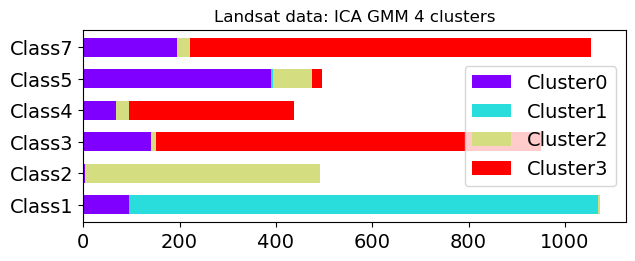

In [385]:
## Bar plot counts
true_classes = list(set(y_train))
df_counts = pd.DataFrame(index=[f'Class{c}' for c in true_classes])
for cluster in set(cluster_labels): 
    unique_values, counts = np.unique(y_train[cluster_labels==cluster], return_counts=True)
    temp = [0]*len(true_classes)
    for i in range(len(unique_values)):
        temp[true_classes.index(unique_values[i])] = counts[i]    
    df_counts[f'Cluster{cluster}'] = temp
ax = df_counts.plot.barh(stacked=True, width=0.6, cmap='rainbow',figsize=(7, 2.5))
plt.rcParams['axes.titley'] = 1.0
ax.set_title(f"Landsat data: ICA GMM {n_clusters} clusters")
ax.tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize)
plt.savefig(f'{data_name}_{method}_{n_clusters}clusters_barplot.png')
plt.show()

### RCA

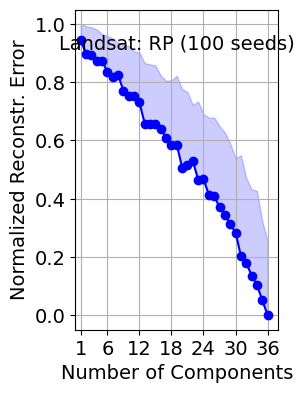

In [406]:
X_train = X_train_orig

max_dims = X_train.shape[1]
df = pd.DataFrame(columns = ['dims', 'seed', 'error'])

for dims, i in product(range(1, max_dims+1), range(100)):

    rp = SparseRandomProjection(random_state=i, n_components=dims, compute_inverse_components = True)
#    rp = GaussianRandomProjection(random_state=i, n_components=dims, compute_inverse_components = True)
    rp.fit(X_train)
    X_train_rf = rp.transform(X_train)
    X_train_rec = X_train_rf @ np.transpose(rp.inverse_components_)
    norm_error = np.linalg.norm(X_train - X_train_rec)/np.linalg.norm(X_train)
    df.loc[len(df.index)] = [dims, i, norm_error]

min_error_per_dim = df.groupby(['dims'])['error'].min()
max_error_per_dim = df.groupby(['dims'])['error'].max()

fontsize = 14
fig = plt.figure(figsize=(2.9,4))
ax = fig.add_axes([0.24, 0.14, 0.7, 0.80])
ax.plot(range(1, max_dims+1), min_error_per_dim.values,'-o', color='blue')
ax.fill_between(range(1, max_dims+1), min_error_per_dim.values, max_error_per_dim.values, alpha=0.2, color='blue')
ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat: RP (100 seeds)', fontsize=fontsize)
ax.set_xlabel('Number of Components', fontsize=fontsize) 
ax.set_ylabel('Normalized Reconstr. Error', fontsize=fontsize)
ax.set_xticks([1]+list(range(6,42,6)))
ax.set_xlim((0,38))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
fig.savefig('Landsat_RP_error.png')
plt.close(fig)


#fontsize = 14
#fig = plt.figure(figsize=(2.9,4))
#ax = fig.add_axes([0.24, 0.14, 0.7, 0.80])
#ax.plot(range(1,X_train.shape[1]+1), aver_kurt,'-o', color='blue')
#ax.tick_params(labelsize=fontsize)
#ax.set_title('Landsat: ICA', fontsize=fontsize)
#ax.set_xlabel('Number of Components', fontsize=fontsize) 
#ax.set_ylabel('Average Absolute Kurtosis', fontsize=fontsize)
#ax.set_xticks([1]+list(range(6,42,6)))
#ax.set_xlim((0,38))
#plt.rcParams['axes.titley'] = 1.0
#plt.grid(True)
#plt.show()
#fig.savefig('Landsat_ICA_kurtosis.png')
#plt.close(fig

In [407]:
X_train = X_train_orig

selected_dim = 31
best_seed = int(df[df['dims']==selected_dim].sort_values('error')['seed'].iloc[0])

rp = SparseRandomProjection(random_state=best_seed, n_components=selected_dim, compute_inverse_components = True)
#    rp = GaussianRandomProjection(random_state=i, n_components=dims, compute_inverse_components = True)
tic = time.perf_counter()
rp.fit(X_train)
toc = time.perf_counter()
print('Time to train', toc-tic)
X_train_rp = rp.transform(X_train)

X_train_rec = X_train_rp @ np.transpose(rp.inverse_components_)
norm_error = np.linalg.norm(X_train - X_train_rec)/np.linalg.norm(X_train)
print('Normalized reconstruction error', norm_error)

Time to train 0.001894499990157783
Normalized reconstruction error 0.20368443220694885


In [324]:
X_train_orig.shape

(4504, 36)

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

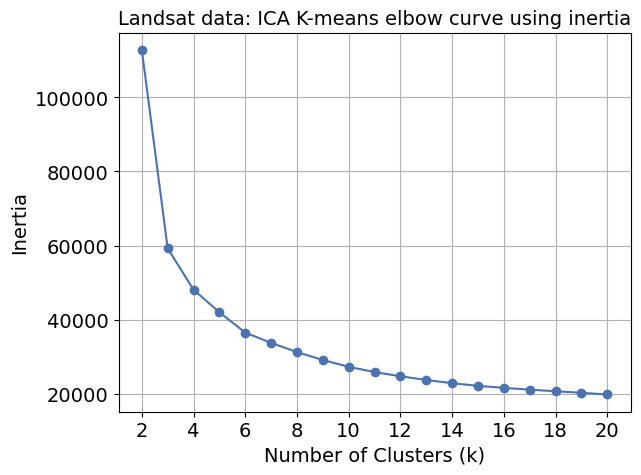

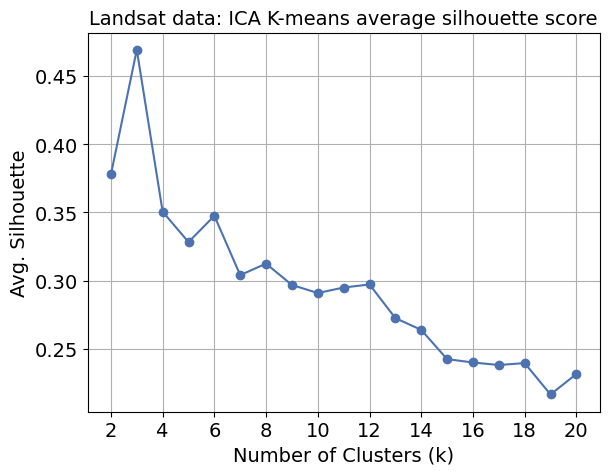

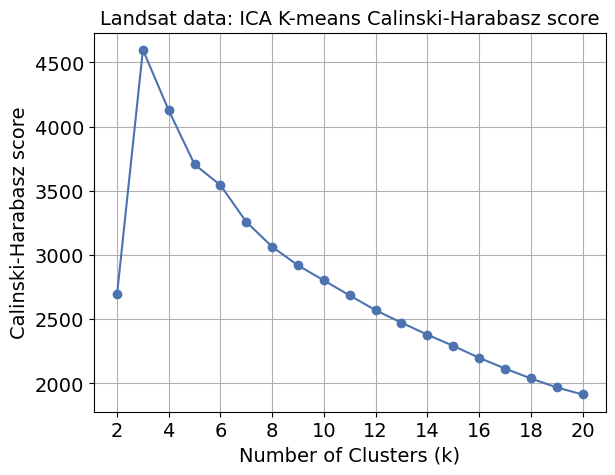

In [361]:
X_train = X_train_rp

max_clusters = 20
inertias, silhouette_avg_scores, ch_scores = kmeans_tuning(X_train, max_clusters, seed)

range_n_clusters = list(range(2, max_clusters+1))

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range_n_clusters, inertias,'-o', color='b')

ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat data: ICA K-means elbow curve using inertia', fontsize=fontsize)
ax.set_xlabel('Number of Clusters (k)', fontsize=fontsize) 
ax.set_ylabel('Inertia', fontsize=fontsize)
ax.set_xticks(range(2,22,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range_n_clusters, silhouette_avg_scores,'-o', color='b')

ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat data: ICA K-means average silhouette score', fontsize=fontsize)
ax.set_xlabel('Number of Clusters (k)', fontsize=fontsize) 
ax.set_ylabel('Avg. Silhouette', fontsize=fontsize)
ax.set_xticks(range(2,22,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)

fontsize = 14
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(range_n_clusters, ch_scores,'-o', color='b')

ax.tick_params(labelsize=fontsize)
ax.set_title('Landsat data: ICA K-means Calinski-Harabasz score', fontsize=fontsize)
ax.set_xlabel('Number of Clusters (k)', fontsize=fontsize) 
ax.set_ylabel('Calinski-Harabasz score', fontsize=fontsize)
ax.set_xticks(range(2,22,2))
plt.rcParams['axes.titley'] = 1.0
plt.grid(True)
plt.show()
#fig.savefig('rhc_effect_max_attempts.png')
plt.close(fig)


K=3


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.46929790219937567


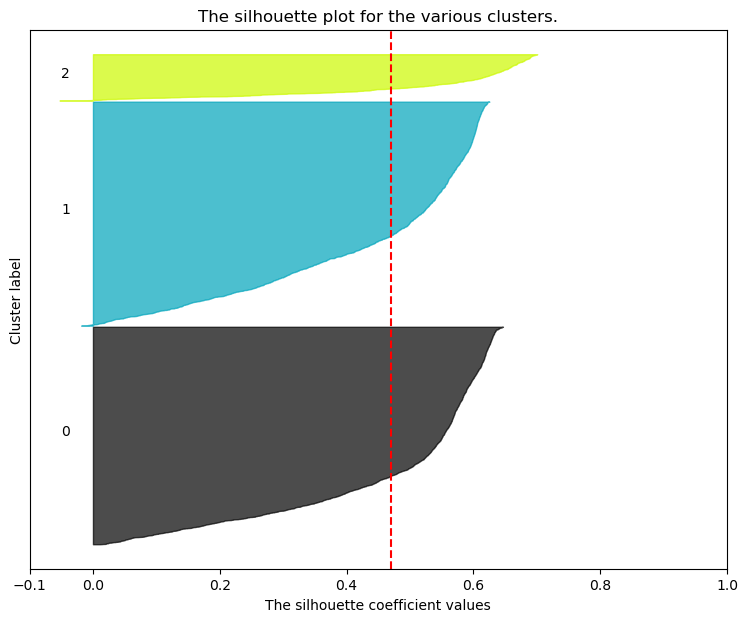

K=4


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3505684762530569


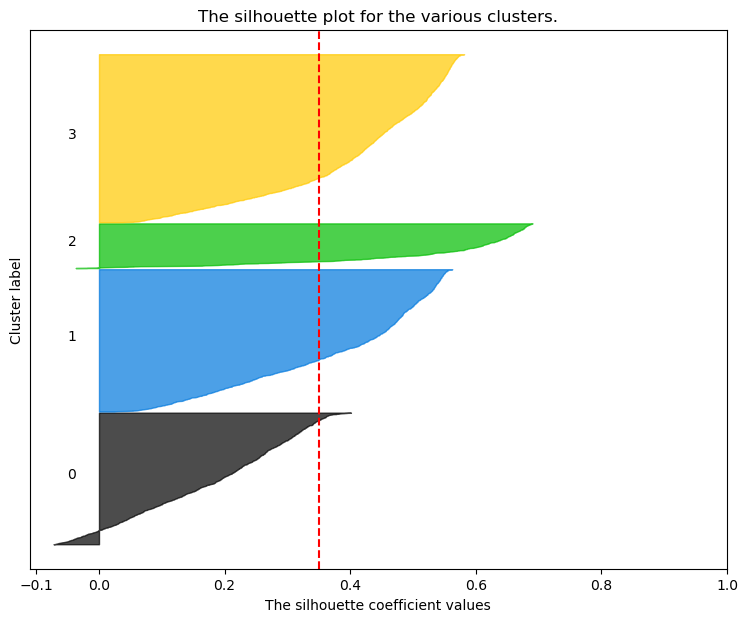

K=5


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.32827871683143


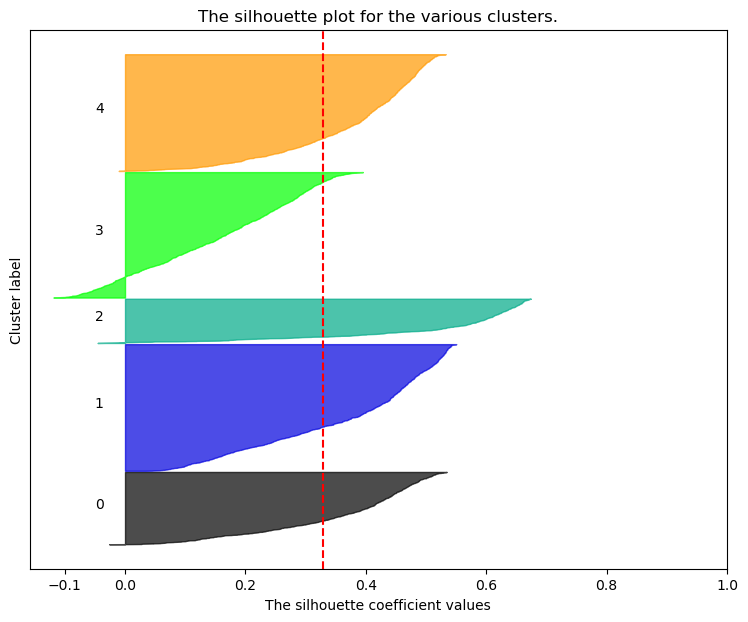

K=6


C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3475386747199366


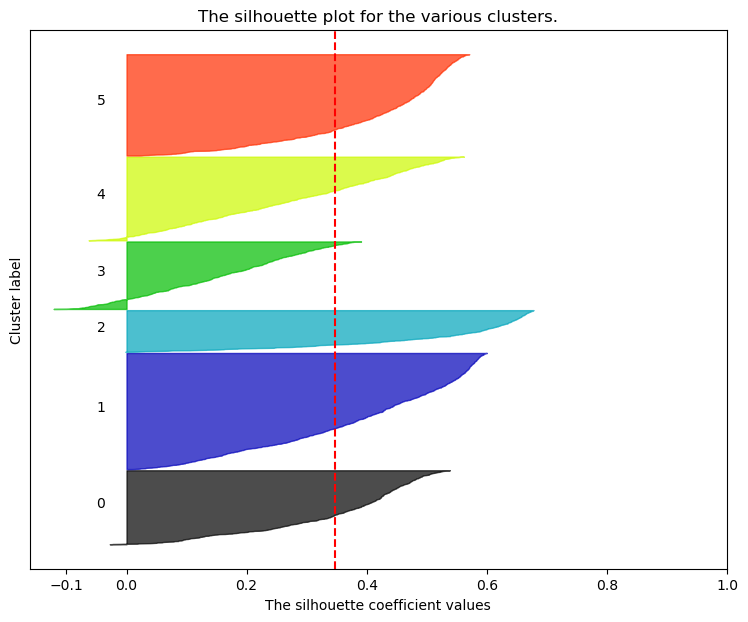

In [362]:
X = X_train_rp

range_n_clusters = list(range(3, 7))

for n_clusters in range_n_clusters:
    
    print(f'K={n_clusters}')
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1000, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)
    y_lower = 10
                                                  
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()
    #fig.savefig('rhc_effect_max_attempts.png')
    plt.close(fig)

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


Train time 0.32966120005585253
__________________________________________________________________________________
algo		inertia		homo	compl	v-meas	ARI	AMI	silhouette
K=4      	48086.932	0.373	0.494	0.425	0.332	0.424	0.351


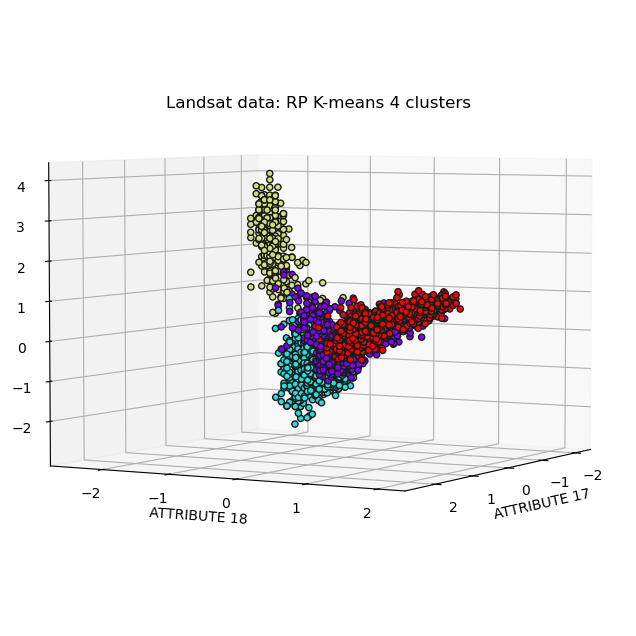

In [403]:

X = X_train_rp
n_clusters=4

tic = time.perf_counter()
kmeans = KMeans(n_clusters=n_clusters, random_state=seed, max_iter=1000, n_init=10).fit(X)
toc = time.perf_counter()
print('Train time', toc-tic)
cluster_labels = kmeans.predict(X)

results=[f'K={n_clusters}', kmeans.inertia_]
# Define the metrics which require only the true labels and estimator labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]
results += [m(y_train, cluster_labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [metrics.silhouette_score(X, cluster_labels)]
# Show the results
formatter_result = (
    "{:9s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(82 * "_")
print("algo\t\tinertia\t\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))

X_train = X_train_orig

fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111,projection="3d", elev=4, azim=30)

scatter = ax.scatter(X_train[:, 16], X_train[:, 17], X_train[:, 19], c=cluster_labels, cmap='rainbow', edgecolor="k", alpha=1)

#ax.legend(scatter.legend_elements()[0], ['1', '2', '3', '4', '5', '6'], loc='center right', title="Classes")

plt.rcParams['axes.titley'] = 0.9

#ax.set_ylim((-2,10))
ax.set_xlabel("ATTRIBUTE 17")
ax.set_ylabel("ATTRIBUTE 18")
ax.set_zlabel("ATTRIBUTE 20")
ax.set_title(f"Landsat data: RP K-means {n_clusters} clusters")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()


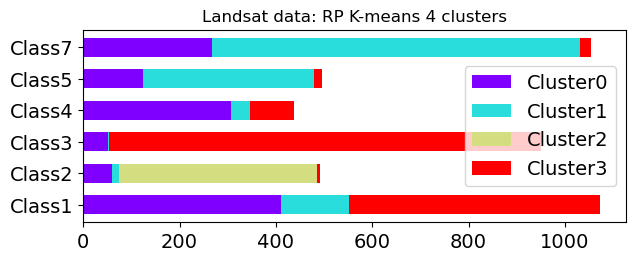

In [391]:
## Bar plot counts
true_classes = list(set(y_train))
df_counts = pd.DataFrame(index=[f'Class{c}' for c in true_classes])
for cluster in set(cluster_labels): 
    unique_values, counts = np.unique(y_train[cluster_labels==cluster], return_counts=True)
    temp = [0]*len(true_classes)
    for i in range(len(unique_values)):
        temp[true_classes.index(unique_values[i])] = counts[i]    
    df_counts[f'Cluster{cluster}'] = temp
ax = df_counts.plot.barh(stacked=True, width=0.6, cmap='rainbow',figsize=(7, 2.5))
plt.rcParams['axes.titley'] = 1.0
ax.set_title(f"Landsat data: RP K-means {n_clusters} clusters")
ax.tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize)
#plt.savefig(f'{data_name}_{method}_{n_clusters}clusters_barplot.png')
plt.show()

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

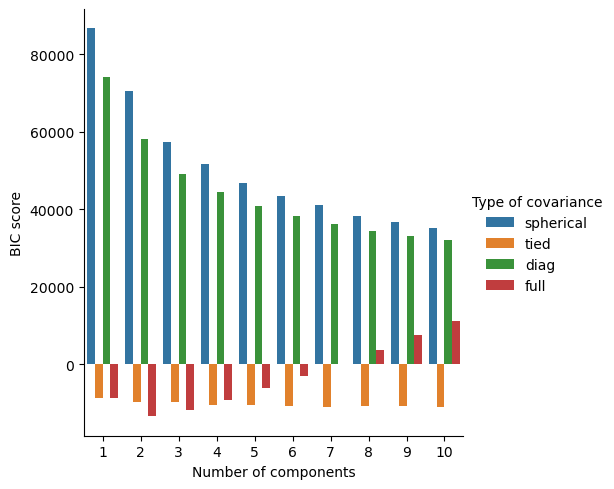

Number of components Type of covariance     BIC score
31                    2               full -13415.762111
32                    3               full -11781.646922
16                    7               tied -10918.664005
19                   10               tied -10912.430059
18                    9               tied -10841.710447

In [392]:
## GMM
X = X_train_rp

def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 11),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(max_iter=1000, tol=1e-4, n_init=10, random_state=seed), param_grid=param_grid, scoring=gmm_bic_score, n_jobs=8
)
grid_search.fit(X)

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

df.sort_values(by="BIC score").head()

C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
C:\Users\akoutras\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmean

Train time 2.4568540999898687
__________________________________________________________________________________
algo		components	homo	compl	v-meas	ARI	AMI	silhouette
gmm      	n_comp=2 	0.210	0.647	0.318	0.181	0.317	0.274


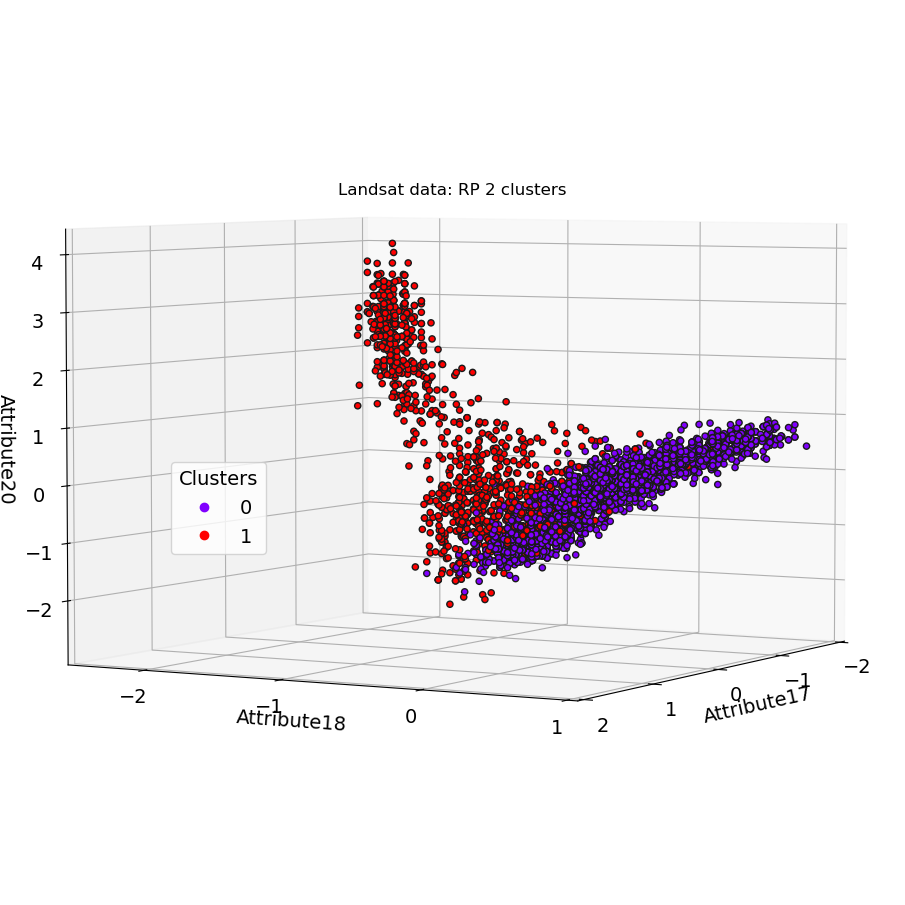

In [410]:
X = X_train_rp

# Predict clusters
method='GMM'
n_clusters=2
covariance_type='full'

tic = time.perf_counter()
gm = GaussianMixture(n_components=n_clusters, covariance_type=covariance_type, max_iter=1000, tol=1e-4, n_init=10, random_state=seed).fit(X)
toc = time.perf_counter()
print('Train time', toc-tic)

gm_labels = gm.predict(X)

      
cluster_labels = gm_labels

results=['gmm', f'n_comp={n_clusters}']
# Define the metrics which require only the true labels and estimator labels
clustering_metrics = [
    metrics.homogeneity_score,
    metrics.completeness_score,
    metrics.v_measure_score,
    metrics.adjusted_rand_score,
    metrics.adjusted_mutual_info_score,
]
results += [m(y_train, cluster_labels) for m in clustering_metrics]

# The silhouette score requires the full dataset
results += [metrics.silhouette_score(X, cluster_labels)]
# Show the results
formatter_result = (
    "{:9s}\t{:9s}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
)
print(82 * "_")
print("algo\t\tcomponents\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
print(formatter_result.format(*results))
# --------------------------------------------------------------------------------
#

X_train = X_train_orig

# Plot clusters
fontsize = 14

elev=4
azim=30

fig = plt.figure(1, figsize=(11.5, 11.5))
ax = fig.add_subplot(111,projection="3d", elev=elev, azim=azim)
plt.rcdefaults()
plot3d_features = ["Attribute17", "Attribute18", "Attribute20"]
col_X = [list(X_df.columns).index(x) for x in plot3d_features]
(X0, X1, X2) = (X_train[:, col_X[0]], X_train[:, col_X[1]], X_train[:, col_X[2]])
scatter = ax.scatter(X0, X1, X2, c=cluster_labels, cmap='rainbow', edgecolor="k", alpha=1)

ax.set_xlabel(plot3d_features[0], fontsize=fontsize)
ax.set_ylabel(plot3d_features[1], fontsize=fontsize,loc = "bottom")
ax.set_zlabel(plot3d_features[2], fontsize=fontsize)
ax.legend(scatter.legend_elements()[0], [f'{c}' for c in set(cluster_labels)], bbox_to_anchor=(0.3,0.5), title="Clusters", fontsize=fontsize,title_fontsize=fontsize)
plt.rcParams['axes.titley'] = 0.85
ax.set_xlim((-2., 2.))
ax.set_ylim((-2.5,1.0))
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_yticks([-2, -1, 0, 1])
ax.set_title(f"Landsat data: RP {n_clusters} clusters")
ax.tick_params(labelsize=fontsize, direction='in', length=3, width=2, colors='black')
plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()
#fig.savefig(f'{data_name}_{method}_{n_clusters}clusters.png'

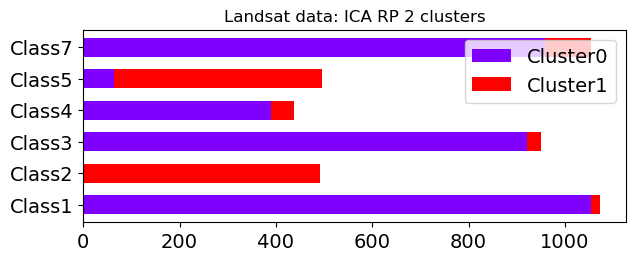

In [395]:
## Bar plot counts
true_classes = list(set(y_train))
df_counts = pd.DataFrame(index=[f'Class{c}' for c in true_classes])
for cluster in set(cluster_labels): 
    unique_values, counts = np.unique(y_train[cluster_labels==cluster], return_counts=True)
    temp = [0]*len(true_classes)
    for i in range(len(unique_values)):
        temp[true_classes.index(unique_values[i])] = counts[i]    
    df_counts[f'Cluster{cluster}'] = temp
ax = df_counts.plot.barh(stacked=True, width=0.6, cmap='rainbow',figsize=(7, 2.5))
plt.rcParams['axes.titley'] = 1.0
ax.set_title(f"Landsat data: ICA RP {n_clusters} clusters")
ax.tick_params(labelsize=fontsize)
ax.legend(fontsize=fontsize)
plt.savefig(f'{data_name}_{method}_{n_clusters}clusters_barplot.png')
plt.show()

In [420]:
X_train = X_train_orig

t_sne = manifold.TSNE(
    n_components=2,
    perplexity=50,
    init="random",
    random_state=seed,
)
S_t_sne = t_sne.fit_transform(X_train)


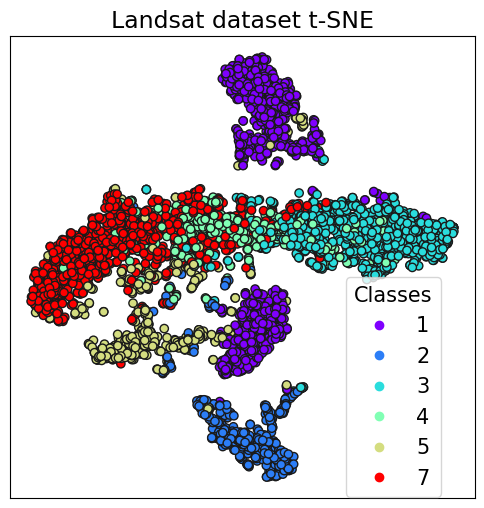

In [439]:
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(111)
scatter = ax.scatter(S_t_sne[:, 0], S_t_sne[:, 1], c=y_train, cmap='rainbow', edgecolor="k", alpha=1)
ax.legend(scatter.legend_elements()[0], [f'{c}' for c in set(y_train)], bbox_to_anchor=(0.7,0.5), title="Classes", fontsize=15,title_fontsize=15)
ax.set_title('Landsat dataset t-SNE', fontsize=17)
#plt.rcParams['axes.titley'] =1
ax.set_xticks([])
ax.set_yticks([])
plt.savefig(f'{data_name}_tSNE.png')
plt.show()


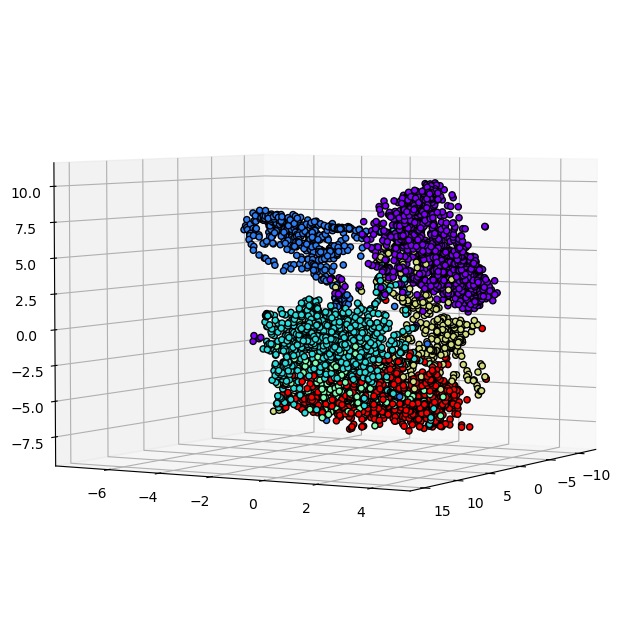

In [81]:
if S_t_sne.shape[1] == 2:
    fig = plt.figure(1, figsize=(8, 8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(S_t_sne[:, 0], S_t_sne[:, 1], c=y_train, cmap='rainbow', edgecolor="k", alpha=1)
else:
    fig = plt.figure(1, figsize=(8, 8))

    ax = fig.add_subplot(111,projection="3d", elev=4, azim=30)
    
    scatter = ax.scatter(S_t_sne[:, 0], S_t_sne[:, 1], S_t_sne[:, 2], c=y_train, cmap='rainbow', edgecolor="k", alpha=1)
    
    #ax.legend(scatter.legend_elements()[0], ['1','2','3','4','5','7'], loc='center right', title="Classes")
    
    plt.rcParams['axes.titley'] = 0.9
    
    #ax.set_xlabel("ATTRIBUTE 17")
    #ax.set_ylabel("ATTRIBUTE 18")
    #ax.set_zlabel("ATTRIBUTE 20")
    #ax.set_title("Landsat: Ground Truth")
    
    plt.subplots_adjust(wspace=0.25, hspace=0.25)
    plt.show()